In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from datetime import date
import quantstats as qs
qs.extend_pandas()

### List of key market dates
#### Bear <br>
2020-02-10 - 2020-03-16 <br>
2007-10-01 - 2009-03-02 <br>
2000-03-13 - 2002-10-30 <br>
1987-08-17 - 1987-11-30 <br>
1980-11-17 - 1982-08-09 <br>
1973-01-02 - 1974-09-30 <br>
1968-12-09 - 1970-05-18 <br>
1966-01-31 - 1966-10-03 <br>
1961-12-04 - 1962-10-22 <br>
1957-07-15 - 1957-12-23 <br>
1937-02-22 - 1942-04-20 <br>
1929-02-09 - 1932-07-05 <br>

#### Bull <br>
1935-03-11 - 1937-02-22 <br>
1942-04-20 - 1957-07-15 <br>
1960-10-24 - 1961-12-04 <br>
1962-10-22 - 1966-01-31 <br>
1966-10-03 - 1968-12-09 <br>
1970-05-18 - 1973-01-02 <br>
1978-03-27 - 1980-11-17 <br>
1982-08-09 - 1987-08-17 <br>
1990-10-15 - 2000-03-13 <br>
2002-10-30 - 2007-10-01 <br>
2009-03-02 - 2020-02-10 <br>
2020-03-20 - 2021-12-20 <br>



## Settings

In [3]:
# Settings
local_data = [True, False][0]
all_local = [True, False][1]
html = [True, False][1]
max_sharpe = [True, False][0]
min_variance = [True, False][0]
target_vol = [True, False][0]
manual_weights  = [True, False][1]
plot_timeseries = [True, False][0]
l2_reg = [True, False][0]
semi_var = [True, False][0]
c_VAR = [True, False][0]
stock = "BZ=F ZN=F GC=F SI=F IYR LQD EEM ^N225 ^N100" #"BZ=F NQ=F ZN=F GC=F SI=F ZT=F ZB=F ES=F IYR EWJ LQD EEM ^N225 ^N100"
fund_folder = r'\fund_series\20220207'
prefix_name = 'yhoo_asset_classes'
train_start = '01/08/2018'
train_end = '07/14/2019'
test_start = '07/15/2019'
test_end = date.today()


# Mean-variance optimization

In [4]:
def generate_performance_metrics (prices_pivot = None, prefix_name = None, file_text = None, benchmark = 'SPY', title = 'Strategy Tearsheet', weights = None, html=False):
    returns = np.log(prices_pivot/prices_pivot.shift(1))
    agg_returns = returns * weights
    portfolio_return = agg_returns.sum(axis=1)
    portfolio_return.name = 'Close'
    portfolio_return.index = pd.to_datetime(portfolio_return.index)
    if html:
        qs.reports.html(returns = portfolio_return, benchmark = benchmark, output = prefix_name + file_text + '.html', title= prefix_name+ title)
    else:
        qs.reports.full(returns = portfolio_return, benchmark = benchmark)

## Downloading data

In [5]:
import yfinance as yf
today = date.today()

In [6]:
if local_data == False:
    date_start = '2000-01-01'
    date_end = today.strftime("%Y-%m-%d")
    time_interval = ['daily', 'weekly','monthly'][0]
    data = yf.download(stock, start=date_start, end=date_end)
    data_close = data['Adj Close']
    concatenated_df_pivot = data_close
    concatenated_df_pivot = concatenated_df_pivot.sort_values(by="Date", key=pd.to_datetime)
    concatenated_df_pivot = concatenated_df_pivot.dropna()
    if plot_timeseries:
        data_close.plot(logy= True, figsize=(30,15))



In [7]:
# ALL FILES
path = r'C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation' + fund_folder                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
iterator = zip(np.arange(len(all_files)).tolist(), all_files)
file_list = dict(iterator)
file_list


{0: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\ASI European Real Estate Share I Inc.csv',
 1: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\Barings Global Agriculture I GBP.csv',
 2: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\BGF World Mining D4 GBP.csv',
 3: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\BlackRock Natural Res Gr & Inc D Inc.csv',
 4: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\BlackRock Throgmorton Trust Ord.csv',
 5: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOptimisation\\fund_series\\20220207\\Finsbury Growth & Income Ord.csv',
 6: 'C:\\Users\\Ferhat\\Python Code\\Github\\Portfolio_Optimisation\\PortfolioOpti

C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\ASI European Real Estate Share I Inc.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\Barings Global Agriculture I GBP.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\BGF World Mining D4 GBP.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\FTF ClearBridge Global Infras Inc XInc.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\GS India Equity R Inc GBP.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\HgCapital Trust Ord.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimisation\PortfolioOptimisation\fund_series\20220207\HSBC World Selection Dynamic C Inc.csv
C:\Users\Ferhat\Python Code\Github\Portfolio_Optimi

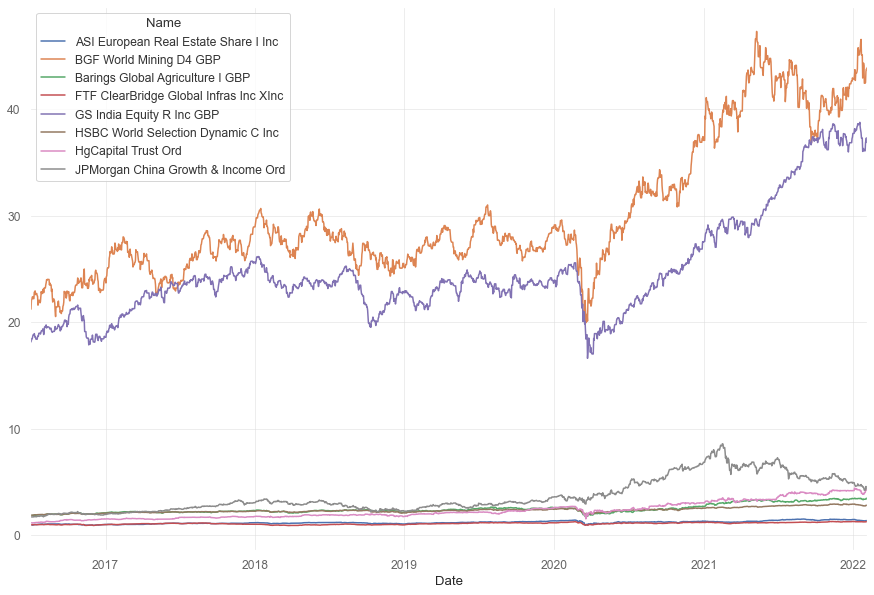

In [8]:
# SOME FILES
if local_data:
    indices = [0, 1, 2, 6, 7, 8, 9, 11]
    sub_files = []

    for index in indices:
        sub_files.append(file_list[index])

    df_from_each_file = (pd.read_csv(f, index_col=False) for f in sub_files)
    concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
    
    for x in range(len(sub_files)):
        print(sub_files[x])
    concatenated_df.drop([ 'High', 'Low', 'Open', 'Volume'], axis=1, inplace=True)
    concatenated_df['Close'] = concatenated_df['Close'].fillna(concatenated_df['NAV'])
    concatenated_df.drop(['NAV'], axis=1, inplace=True)
    concatenated_df_pivot = concatenated_df.pivot(columns='Name', values='Close', index='Date')
    concatenated_df_pivot.index = pd.to_datetime(concatenated_df_pivot.index, format = '%m/%d/%Y')#.strftime('%m/%d/%Y')
    #concatenated_df_pivot['Date']= pd.to_datetime(concatenated_df_pivot['Date'])
    concatenated_df_pivot = concatenated_df_pivot.sort_values(by="Date", key=pd.to_datetime)
    concatenated_df_pivot = concatenated_df_pivot.dropna()

    if plot_timeseries:
        concatenated_df_pivot.plot(figsize=(15,10))

In [9]:
concatenated_df_pivot

Name        ASI European Real Estate Share I Inc  BGF World Mining D4 GBP  \
Date                                                                        
2016-07-01                                1.0133                    21.23   
2016-07-02                                1.0133                    21.23   
2016-07-03                                1.0133                    21.23   
2016-07-04                                1.0028                    22.07   
2016-07-05                                0.9887                    22.15   
...                                          ...                      ...   
2022-01-31                                1.3699                    42.49   
2022-02-01                                1.3878                    43.52   
2022-02-02                                1.3894                    43.74   
2022-02-03                                1.3788                    43.68   
2022-02-04                                1.3645                    43.89   

Name        Barings Global Agriculture I GBP  \
Date                                           
2016-07-01                             1.857   
2016-07-02                             1.857   
2016-07-03                             1.857   
2016-07-04                             1.863   
2016-07-05                             1.867   
...                                      ...   
2022-01-31                             3.416   
2022-02-01                             3.429   
2022-02-02                             3.490   
2022-02-03                             3.444   
2022-02-04                             3.437   

Name        FTF ClearBridge Global Infras Inc XInc  GS India Equity R Inc GBP  \
Date                                                                            
2016-07-01                                  1.0000                      18.16   
2016-07-02                                  1.0000                      18.16   
2016-07-03                                  1.0000                      18.16   
2016-07-04                                  1.0020                      18.30   
2016-07-05                                  0.9991                      18.46   
...                                            ...                        ...   
2022-01-31                                  1.2780                      36.88   
2022-02-01                                  1.2940                      37.11   
2022-02-02                                  1.2930                      37.29   
2022-02-03                                  1.2910                      36.88   
2022-02-04                                  1.2840                      36.85   

Name        HSBC World Selection Dynamic C Inc  HgCapital Trust Ord  \
Date                                                                  
2016-07-01                              1.8860                1.195   
2016-07-02                              1.8860                1.195   
2016-07-03                              1.8860                1.195   
2016-07-04                              1.8970                1.179   
2016-07-05                              1.9010                1.179   
...                                        ...                  ...   
2022-01-31                              2.7925                4.180   
2022-02-01                              2.8203                4.260   
2022-02-02                              2.8296                4.275   
2022-02-03                              2.8164                4.300   
2022-02-04                              2.7989                4.245   

Name        JPMorgan China Growth & Income Ord  
Date                                            
2016-07-01                             1.75000  
2016-07-02                             1.75000  
2016-07-03                             1.75000  
2016-07-04                             1.73625  
2016-07-05                             1.72500  
...                                        ...  
202

## Split the data

In [10]:
train_df = concatenated_df_pivot.loc[train_start:train_end]
train_df

Name        ASI European Real Estate Share I Inc  BGF World Mining D4 GBP  \
Date                                                                        
2018-01-08                                1.2044                    30.07   
2018-01-09                                1.2022                    30.17   
2018-01-10                                1.1949                    30.24   
2018-01-11                                1.1889                    30.37   
2018-01-12                                1.1836                    30.50   
...                                          ...                      ...   
2019-07-10                                1.2556                    29.56   
2019-07-11                                1.2565                    29.58   
2019-07-12                                1.2585                    29.66   
2019-07-13                                1.2585                    29.66   
2019-07-14                                1.2585                    29.66   

Name        Barings Global Agriculture I GBP  \
Date                                           
2018-01-08                             2.386   
2018-01-09                             2.373   
2018-01-10                             2.373   
2018-01-11                             2.366   
2018-01-12                             2.357   
...                                      ...   
2019-07-10                             2.538   
2019-07-11                             2.523   
2019-07-12                             2.525   
2019-07-13                             2.525   
2019-07-14                             2.525   

Name        FTF ClearBridge Global Infras Inc XInc  GS India Equity R Inc GBP  \
Date                                                                            
2018-01-08                                   1.059                      26.15   
2018-01-09                                   1.056                      26.16   
2018-01-10                                   1.047                      26.11   
2018-01-11                                   1.047                      26.14   
2018-01-12                                   1.041                      25.92   
...                                            ...                        ...   
2019-07-10                                   1.192                      24.11   
2019-07-11                                   1.197                      24.10   
2019-07-12                                   1.194                      24.05   
2019-07-13                                   1.194                      24.05   
2019-07-14                                   1.194                      24.05   

Name        HSBC World Selection Dynamic C Inc  HgCapital Trust Ord  \
Date                                                                  
2018-01-08                            2.315000                1.790   
2018-01-09                            2.319000                1.795   
2018-01-10                            2.316000                1.780   
2018-01-11                            2.323000                1.785   
2018-01-12                            2.315767                1.785   
...                                        ...                  ...   
2019-07-10                            2.425692                2.180   
2019-07-11                            2.427739                2.180   
2019-07-12                            2.431370                2.200   
2019-07-13                            2.431370                2.200   
2019-07-14                            2.431370                2.200   

Name        JPMorgan China Growth & Income Ord  
Date                                            
2018-01-08                                3.20  
2018-01-09                                3.20  
2018-01-10                                3.28  
2018-01-11                                3.27  
2018-01-12                                3.28  
...                                        ...  
201

In [11]:
test_df = concatenated_df_pivot.loc[test_start:test_end]
test_df

Name        ASI European Real Estate Share I Inc  BGF World Mining D4 GBP  \
Date                                                                        
2019-07-15                                1.2594                    29.94   
2019-07-16                                1.2574                    30.13   
2019-07-17                                1.2631                    30.11   
2019-07-18                                1.2576                    30.13   
2019-07-19                                1.2526                    30.81   
...                                          ...                      ...   
2022-01-31                                1.3699                    42.49   
2022-02-01                                1.3878                    43.52   
2022-02-02                                1.3894                    43.74   
2022-02-03                                1.3788                    43.68   
2022-02-04                                1.3645                    43.89   

Name        Barings Global Agriculture I GBP  \
Date                                           
2019-07-15                             2.542   
2019-07-16                             2.573   
2019-07-17                             2.574   
2019-07-18                             2.548   
2019-07-19                             2.546   
...                                      ...   
2022-01-31                             3.416   
2022-02-01                             3.429   
2022-02-02                             3.490   
2022-02-03                             3.444   
2022-02-04                             3.437   

Name        FTF ClearBridge Global Infras Inc XInc  GS India Equity R Inc GBP  \
Date                                                                            
2019-07-15                                   1.185                      24.16   
2019-07-16                                   1.195                      24.46   
2019-07-17                                   1.191                      24.41   
2019-07-18                                   1.186                      24.11   
2019-07-19                                   1.183                      23.65   
...                                            ...                        ...   
2022-01-31                                   1.278                      36.88   
2022-02-01                                   1.294                      37.11   
2022-02-02                                   1.293                      37.29   
2022-02-03                                   1.291                      36.88   
2022-02-04                                   1.284                      36.85   

Name        HSBC World Selection Dynamic C Inc  HgCapital Trust Ord  \
Date                                                                  
2019-07-15                            2.433889                2.180   
2019-07-16                            2.447466                2.180   
2019-07-17                            2.444750                2.190   
2019-07-18                            2.427452                2.180   
2019-07-19                            2.427627                2.185   
...                                        ...                  ...   
2022-01-31                            2.792500                4.180   
2022-02-01                            2.820300                4.260   
2022-02-02                            2.829600                4.275   
2022-02-03                            2.816400                4.300   
2022-02-04                            2.798900                4.245   

Name        JPMorgan China Growth & Income Ord  
Date                                            
2019-07-15                               2.880  
2019-07-16                               2.915  
2019-07-17                               2.905  
2019-07-18                               2.875  
2019-07-19                               2.885  
...                                        ...  
202

## Calculating the covariance matrix

In [12]:
import pypfopt
pypfopt.__version__

'1.5.1'

In [13]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(train_df, frequency=252)
sample_cov

Name                                    ASI European Real Estate Share I Inc  \
Name                                                                           
ASI European Real Estate Share I Inc                                0.009339   
BGF World Mining D4 GBP                                             0.003883   
Barings Global Agriculture I GBP                                    0.004212   
FTF ClearBridge Global Infras Inc XInc                              0.004387   
GS India Equity R Inc GBP                                           0.003598   
HSBC World Selection Dynamic C Inc                                  0.003074   
HgCapital Trust Ord                                                 0.002657   
JPMorgan China Growth & Income Ord                                  0.008056   

Name                                    BGF World Mining D4 GBP  \
Name                                                              
ASI European Real Estate Share I Inc                   0.003883   
BGF World Mining D4 GBP                                0.031366   
Barings Global Agriculture I GBP                       0.007138   
FTF ClearBridge Global Infras Inc XInc                 0.004230   
GS India Equity R Inc GBP                              0.008353   
HSBC World Selection Dynamic C Inc                     0.005654   
HgCapital Trust Ord                                    0.000789   
JPMorgan China Growth & Income Ord                     0.017092   

Name                                    Barings Global Agriculture I GBP  \
Name                                                                       
ASI European Real Estate Share I Inc                            0.004212   
BGF World Mining D4 GBP                                         0.007138   
Barings Global Agriculture I GBP                                0.011731   
FTF ClearBridge Global Infras Inc XInc                          0.004837   
GS India Equity R Inc GBP                                       0.003971   
HSBC World Selection Dynamic C Inc                              0.007031   
HgCapital Trust Ord                                             0.003071   
JPMorgan China Growth & Income Ord                              0.009227   

Name                                    FTF ClearBridge Global Infras Inc XInc  \
Name                                                                             
ASI European Real Estate Share I Inc                                  0.004387   
BGF World Mining D4 GBP                                               0.004230   
Barings Global Agriculture I GBP                                      0.004837   
FTF ClearBridge Global Infras Inc XInc                                0.007420   
GS India Equity R Inc GBP                                             0.002488   
HSBC World Selection Dynamic C Inc                                    0.003915   
HgCapital Trust Ord                                                   0.000970   
JPMorgan China Growth & Income Ord                                    0.004180   

Name                                    GS India Equity R Inc GBP  \
Name                                                                
ASI European Real Estate Share I Inc                     0.003598   
BGF World Mining D4 GBP                                  0.008353   
Barings Global Agriculture I GBP                         0.003971   
FTF ClearBridge Global Infras Inc XInc                   0.002488   
GS India Equity R Inc GBP                                0.017552   
HSBC World Selection Dynamic C Inc                       0.002704   
HgCapital Trust Ord                                      0.001802   
JPMorgan China Growth & Income Ord                       0.012207   

Name                                    HSBC World Selection Dynamic C Inc  \
Name                                                                         
ASI European Real Estate Share I Inc                              0.003074   
BGF World Mining D4 G

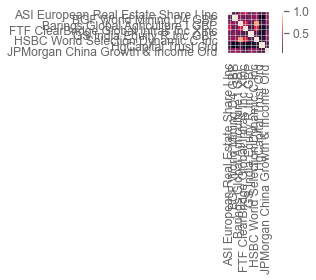

In [14]:
plotting.plot_covariance(sample_cov, plot_correlation=True)

## Return estimation

In [15]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(train_df)
mu

Name
ASI European Real Estate Share I Inc      0.021772
BGF World Mining D4 GBP                   0.023548
Barings Global Agriculture I GBP          0.022315
FTF ClearBridge Global Infras Inc XInc    0.021465
GS India Equity R Inc GBP                 0.022380
HSBC World Selection Dynamic C Inc        0.021689
HgCapital Trust Ord                       0.021786
JPMorgan China Growth & Income Ord        0.025652
Name: mkt, dtype: float64

## Manual Weights

In [16]:
if manual_weights:
    concatenated_df['Name'].unique()
    initial_weights = [0.2, 0.2, 0.2, 0.2, 0.1, 0.1]
    unique_fund_names = concatenated_df['Name'].unique()

    iterator = zip(unique_fund_names.tolist(), initial_weights)
    comb_weights = dict(iterator)
    comb_weights
    generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'manual_weights', prefix_name = prefix_name, file_text = 'manual_weights', weights = comb_weights)



## Long/short min variance

In [17]:
from pypfopt import EfficientFrontier

In [18]:
S = risk_models.CovarianceShrinkage(train_df).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0, 0.4))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ASI European Real Estate Share I Inc', 0.15202),
             ('BGF World Mining D4 GBP', 0.0),
             ('Barings Global Agriculture I GBP', 0.0),
             ('FTF ClearBridge Global Infras Inc XInc', 0.2505),
             ('GS India Equity R Inc GBP', 0.11594),
             ('HSBC World Selection Dynamic C Inc', 0.34356),
             ('HgCapital Trust Ord', 0.13799),
             ('JPMorgan China Growth & Income Ord', 0.0)])

In [19]:
ef.portfolio_performance(verbose=True);

Annual volatility: 6.6%


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-08  2018-01-08
End Period                 2019-07-14  2019-07-14
Risk-Free Rate             0.0%        0.0%
Time in Market             70.0%       69.0%

Cumulative Return          7.0%        12.92%
CAGR﹪                     4.57%       8.37%

Sharpe                     0.5         0.49
Smart Sharpe               0.48        0.47
Sortino                    0.69        0.67
Smart Sortino              0.67        0.65
Sortino/√2                 0.49        0.47
Smart Sortino/√2           0.47        0.46
Omega                      1.1         1.1

Max Drawdown               -9.8%       -19.35%
Longest DD Days            232         203
Volatility (ann.)          6.56%       12.97%
R^2                        0.02        0.02
Calmar                     0.47        0.43
Skew                       -0.54       -0.45
Kurtosis                   3.48        6.7

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-08-13  2018-12-27  2019-04-02   232     -9.802456         -9.621320
2  2018-01-10  2018-03-26  2018-07-27   198     -8.738659         -8.195320
3  2019-04-26  2019-05-13  2019-05-22    26     -2.294306         -2.043756
4  2019-05-29  2019-06-03  2019-06-07     9     -1.080845         -0.898197
5  2018-07-30  2018-08-02  2018-08-06     7     -0.947800         -0.588155

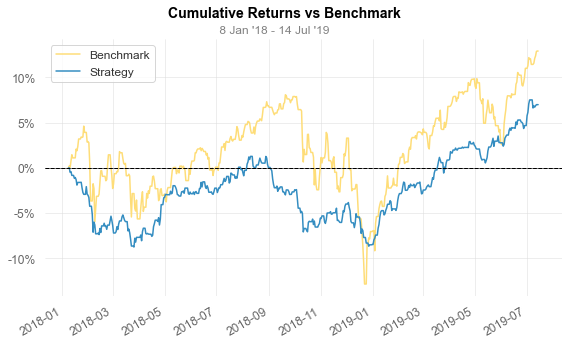

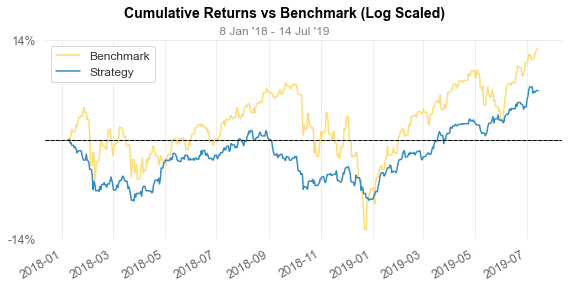

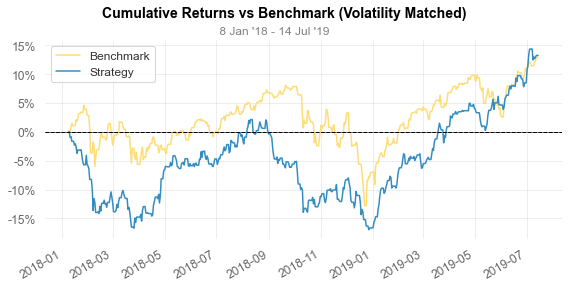

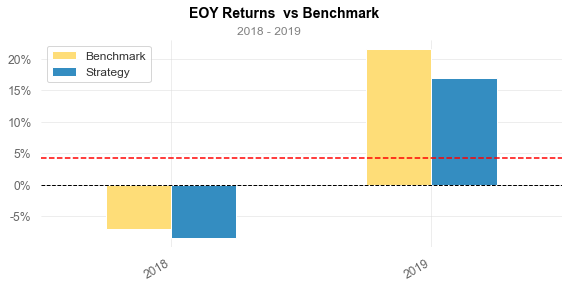

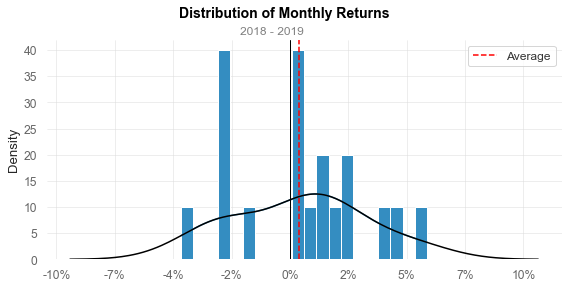

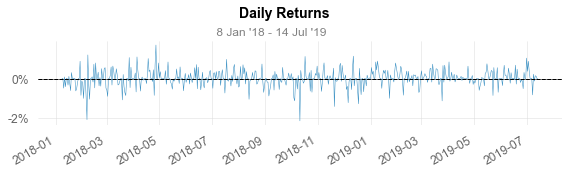

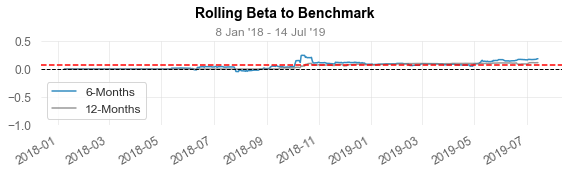

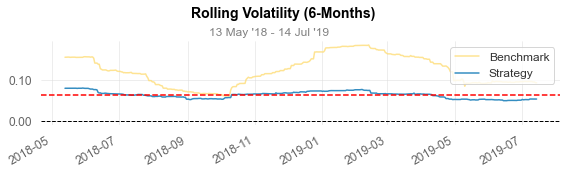

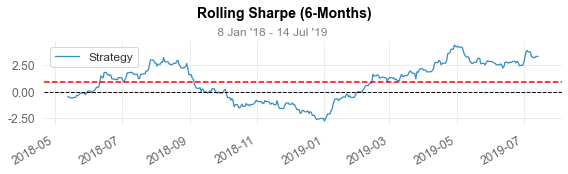

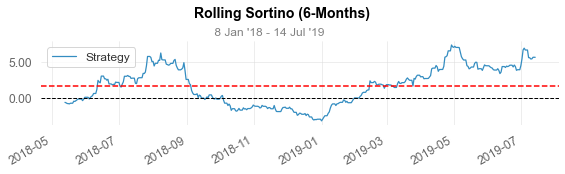

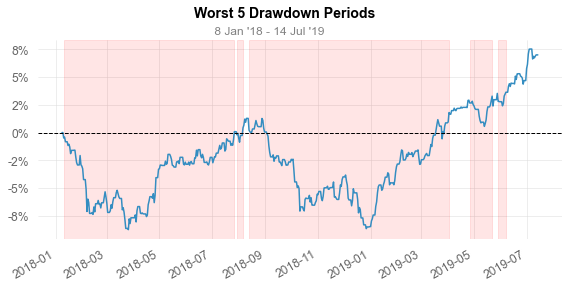

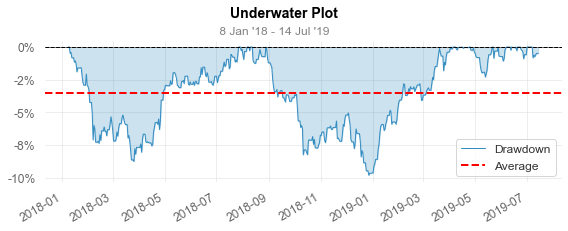

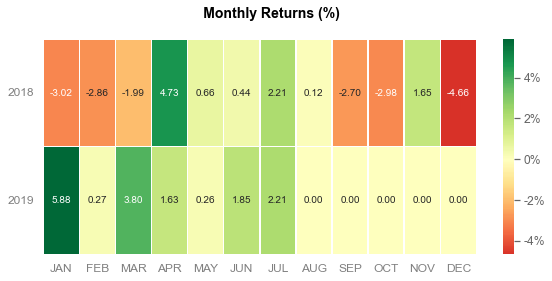

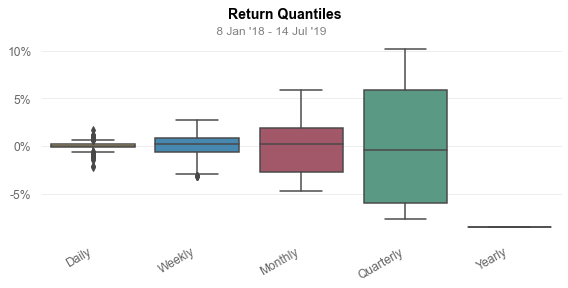

In [20]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'min_variance_train', prefix_name = prefix_name, file_text = 'min_variance_train', weights = weights, html = html)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2019-07-15  2019-07-15
End Period                 2022-02-04  2022-02-04
Risk-Free Rate             0.0%        0.0%
Time in Market             70.0%       70.0%

Cumulative Return          21.73%      55.48%
CAGR﹪                     7.98%       18.8%

Sharpe                     0.52        0.71
Smart Sharpe               0.5         0.68
Sortino                    0.7         0.98
Smart Sortino              0.68        0.94
Sortino/√2                 0.5         0.69
Smart Sortino/√2           0.48        0.66
Omega                      1.13        1.13

Max Drawdown               -28.35%     -33.72%
Longest DD Days            321         170
Volatility (ann.)          11.47%      19.4%
R^2                        0.02        0.02
Calmar                     0.28        0.56
Skew                       -1.09       -0.83
Kurtosis                   22.18       21.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-21  2020-03-23  2021-01-07   321    -28.351859        -25.790195
2  2022-01-05  2022-01-25  2022-02-04    30     -6.744794         -6.364195
3  2021-01-12  2021-02-23  2021-04-08    86     -4.234541         -4.043498
4  2021-09-03  2021-10-06  2021-11-02    60     -3.933186         -3.158160
5  2019-07-31  2019-08-15  2019-09-26    57     -3.740354         -3.586014

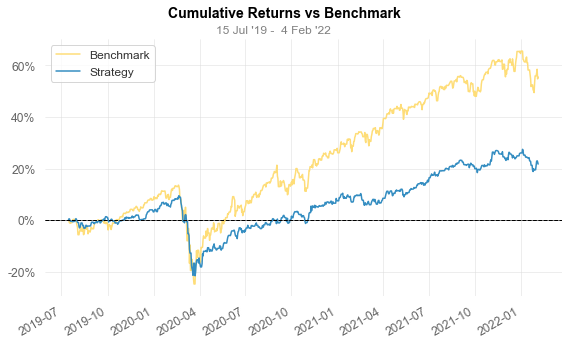

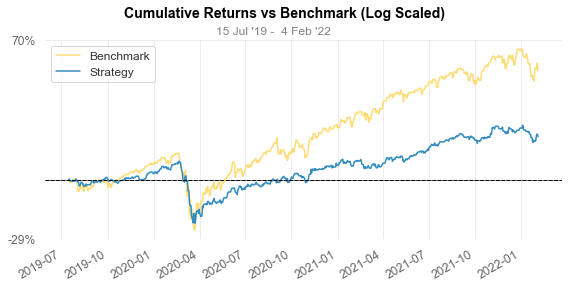

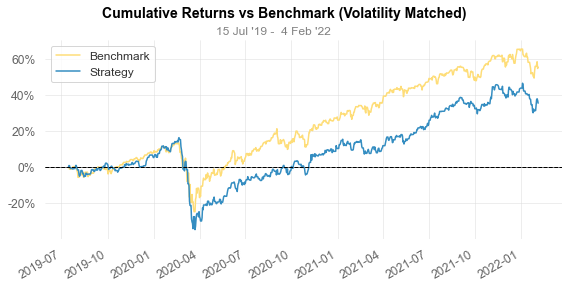

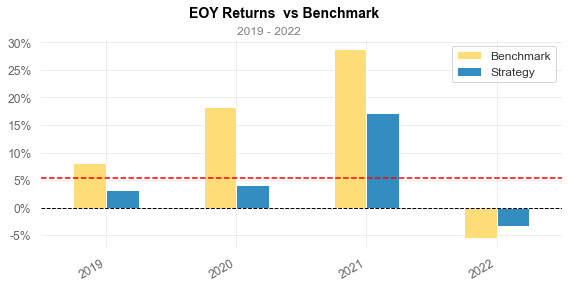

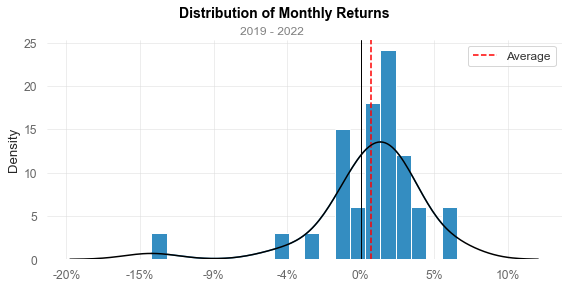

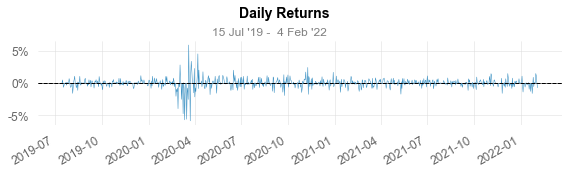

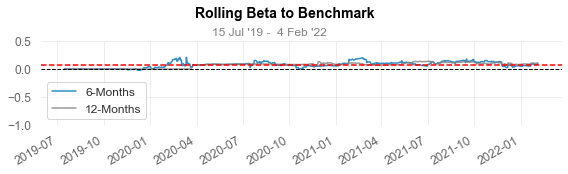

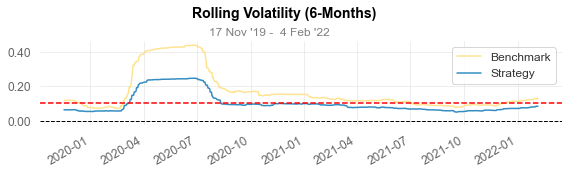

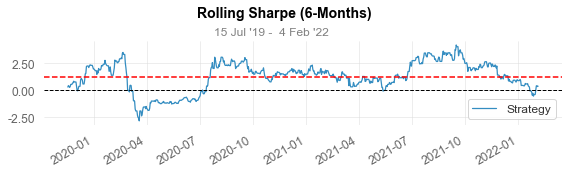

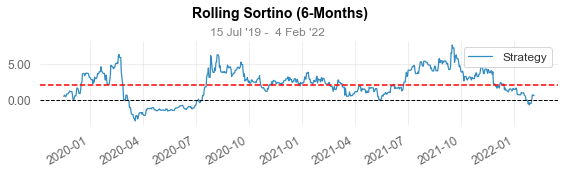

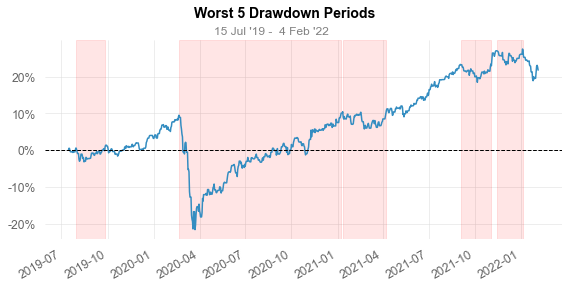

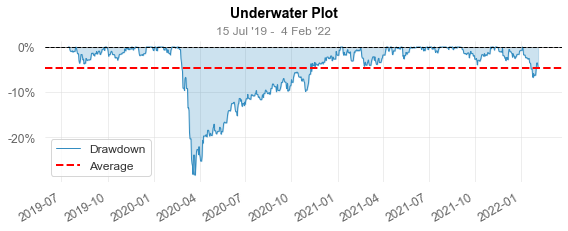

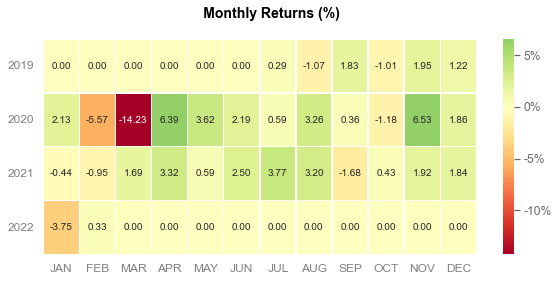

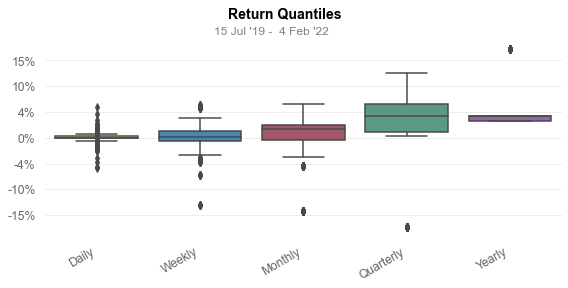

In [21]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'min_variance_test', prefix_name = prefix_name, file_text = 'min_variance_test', weights = weights, html = html)

## Max Sharpe

In [22]:
S = risk_models.CovarianceShrinkage(train_df).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('ASI European Real Estate Share I Inc', 0.12395),
             ('BGF World Mining D4 GBP', 0.12722),
             ('Barings Global Agriculture I GBP', 0.12987),
             ('FTF ClearBridge Global Infras Inc XInc', 0.12269),
             ('GS India Equity R Inc GBP', 0.12475),
             ('HSBC World Selection Dynamic C Inc', 0.11845),
             ('HgCapital Trust Ord', 0.12452),
             ('JPMorgan China Growth & Income Ord', 0.12855)])

In [23]:
ef.portfolio_performance(verbose=True);

Expected annual return: 2.3%
Annual volatility: 8.4%
Sharpe Ratio: 0.03


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-08  2018-01-08
End Period                 2019-07-14  2019-07-14
Risk-Free Rate             0.0%        0.0%
Time in Market             70.0%       69.0%

Cumulative Return          2.57%       12.92%
CAGR﹪                     1.69%       8.37%

Sharpe                     0.18        0.49
Smart Sharpe               0.18        0.49
Sortino                    0.24        0.67
Smart Sortino              0.24        0.66
Sortino/√2                 0.17        0.47
Smart Sortino/√2           0.17        0.47
Omega                      1.04        1.04

Max Drawdown               -12.86%     -19.35%
Longest DD Days            525         203
Volatility (ann.)          8.51%       12.97%
R^2                        0.05        0.05
Calmar                     0.13        0.43
Skew                       -0.37       -0.45
Kurtosis                   2.52        6.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-09  2018-12-27  2019-06-18   525    -12.860912        -12.472371
2  2019-07-05  2019-07-11  2019-07-14     9     -1.222002         -1.218718
3  2019-06-19  2019-06-19  2019-06-20     1     -0.507179          0.000000
4  2019-06-24  2019-06-27  2019-07-01     7     -0.502338         -0.403057

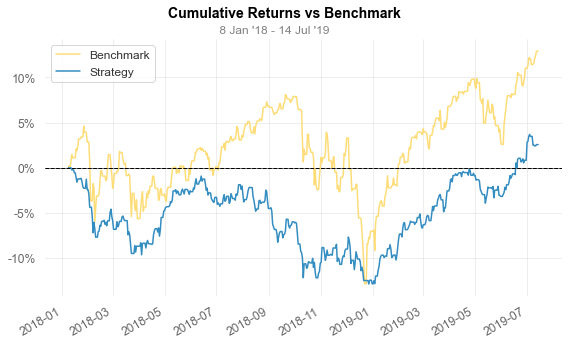

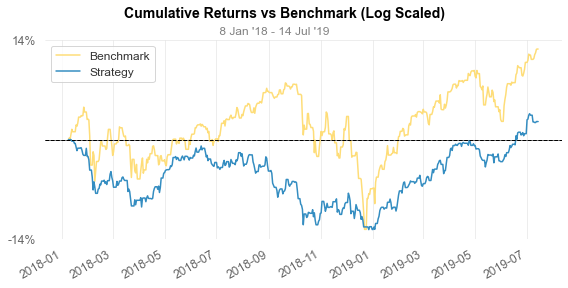

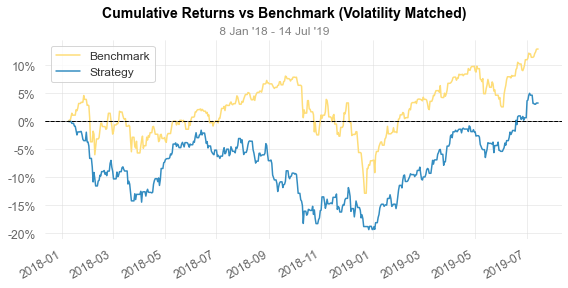

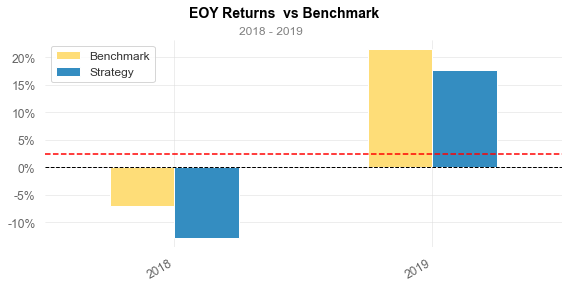

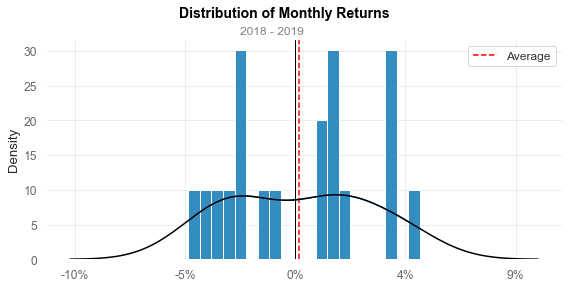

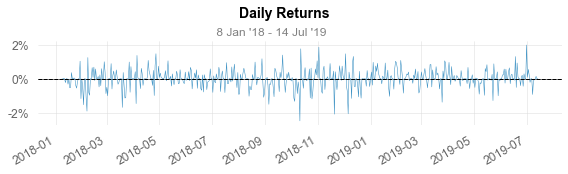

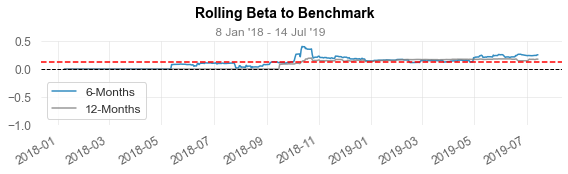

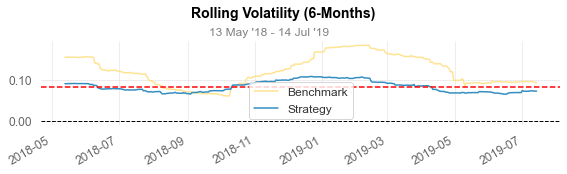

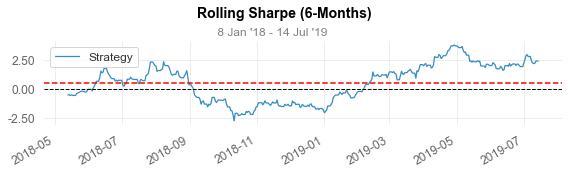

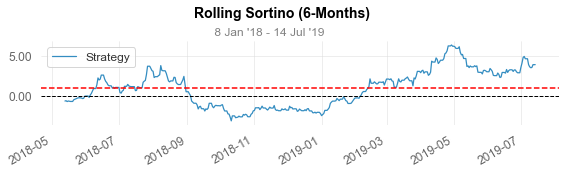

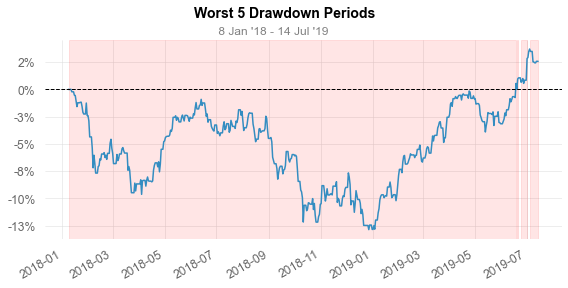

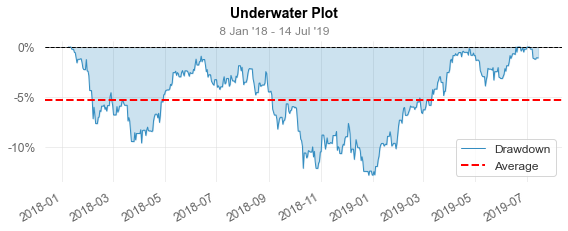

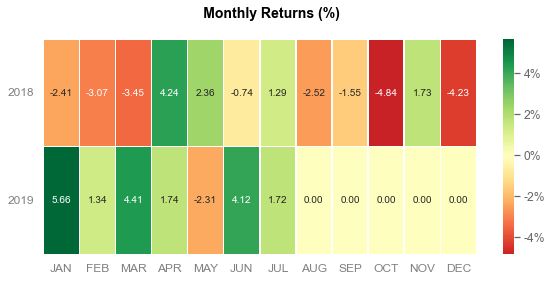

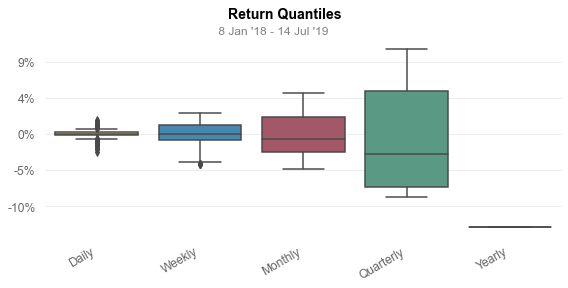

In [24]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'max_sharpe_train', prefix_name = prefix_name, file_text = 'max_sharpe_train', weights = weights, html = html)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2019-07-15  2019-07-15
End Period                 2022-02-04  2022-02-04
Risk-Free Rate             0.0%        0.0%
Time in Market             71.0%       70.0%

Cumulative Return          32.26%      55.48%
CAGR﹪                     11.53%      18.8%

Sharpe                     0.62        0.71
Smart Sharpe               0.61        0.71
Sortino                    0.84        0.98
Smart Sortino              0.84        0.97
Sortino/√2                 0.6         0.69
Smart Sortino/√2           0.59        0.69
Omega                      1.16        1.16

Max Drawdown               -29.55%     -33.72%
Longest DD Days            203         170
Volatility (ann.)          13.72%      19.4%
R^2                        0.05        0.05
Calmar                     0.39        0.56
Skew                       -0.74       -0.83
Kurtosis                   21.85       21.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-21  2020-03-19  2020-09-11   203    -29.554692        -25.865234
2  2021-11-15  2022-01-28  2022-02-04    81     -7.814829         -7.499790
3  2021-02-17  2021-03-08  2021-05-27    99     -7.027731         -7.009268
4  2021-08-12  2021-10-06  2021-11-04    84     -5.353789         -4.510917
5  2019-07-31  2019-08-16  2019-09-23    54     -4.513287         -4.337865

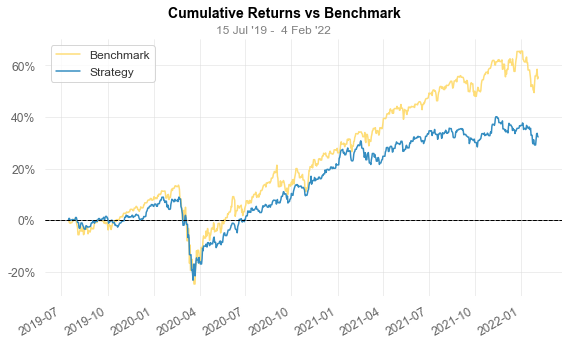

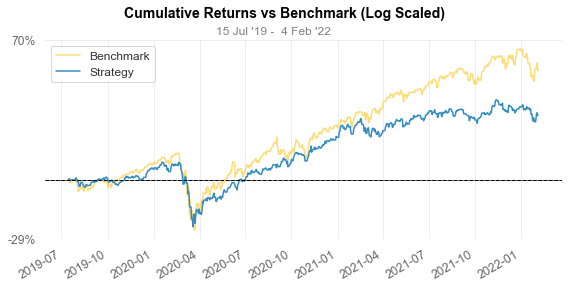

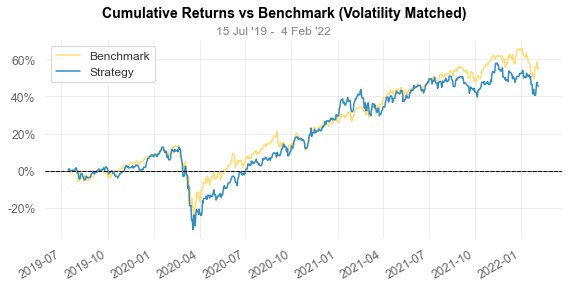

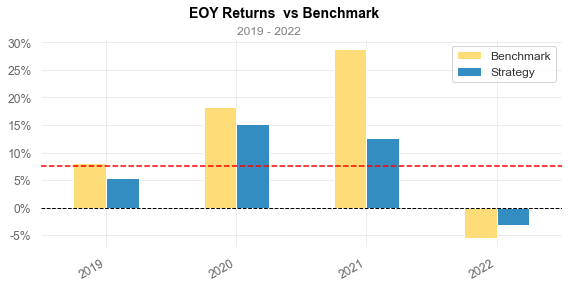

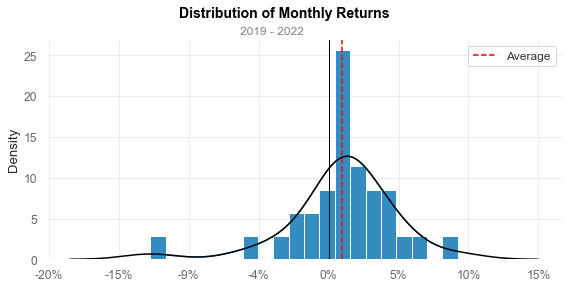

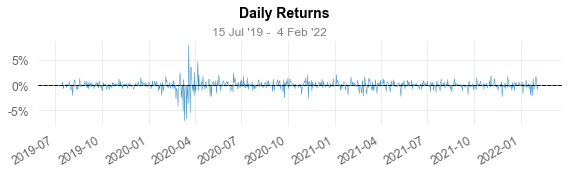

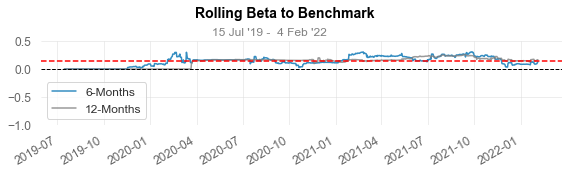

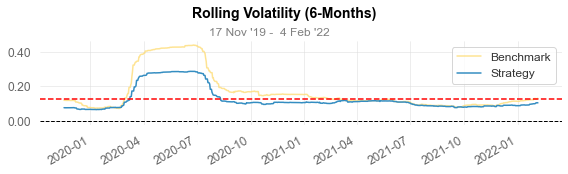

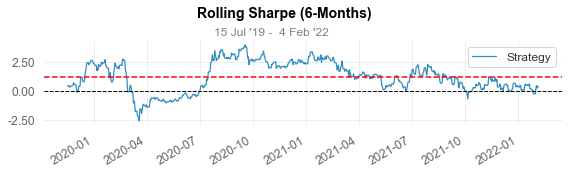

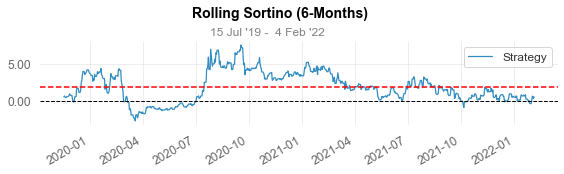

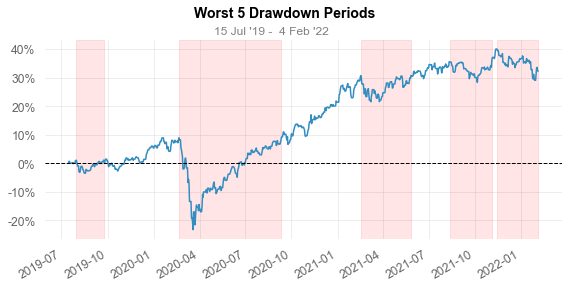

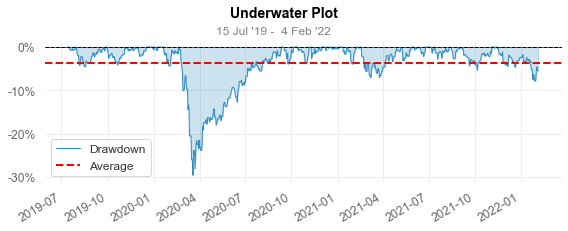

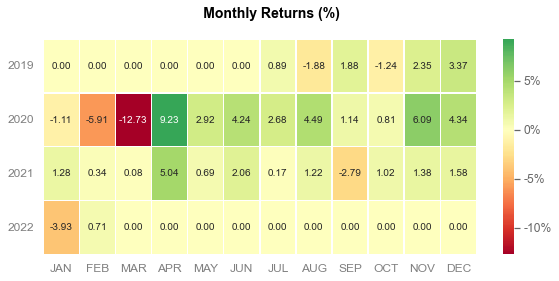

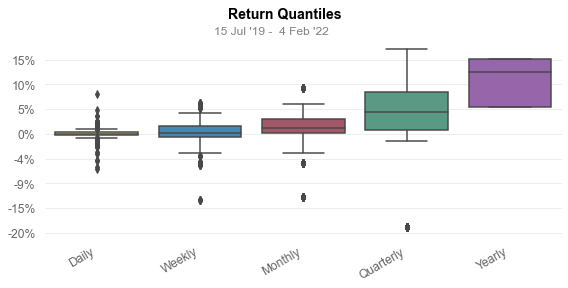

In [25]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'max_sharpe_test', prefix_name = prefix_name, file_text = 'max_sharpe_test', weights = weights, html = html)

## Maximise return for a given risk, with L2 regularisation

In [26]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.08)
weights = ef.clean_weights()
weights

OrderedDict([('ASI European Real Estate Share I Inc', 0.13053),
             ('BGF World Mining D4 GBP', 0.11336),
             ('Barings Global Agriculture I GBP', 0.09956),
             ('FTF ClearBridge Global Infras Inc XInc', 0.1371),
             ('GS India Equity R Inc GBP', 0.12633),
             ('HSBC World Selection Dynamic C Inc', 0.15923),
             ('HgCapital Trust Ord', 0.12753),
             ('JPMorgan China Growth & Income Ord', 0.10637)])

In [27]:
ef.portfolio_performance(verbose=True)

Expected annual return: 2.2%
Annual volatility: 8.0%
Sharpe Ratio: 0.03


(0.022463380341547948, 0.07999999885772731, 0.030792254709013738)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-08  2018-01-08
End Period                 2019-07-14  2019-07-14
Risk-Free Rate             0.0%        0.0%
Time in Market             70.0%       69.0%

Cumulative Return          3.19%       12.92%
CAGR﹪                     2.1%        8.37%

Sharpe                     0.22        0.49
Smart Sharpe               0.22        0.49
Sortino                    0.3         0.67
Smart Sortino              0.3         0.67
Sortino/√2                 0.21        0.47
Smart Sortino/√2           0.21        0.47
Omega                      1.04        1.04

Max Drawdown               -12.21%     -19.35%
Longest DD Days            470         203
Volatility (ann.)          8.08%       12.97%
R^2                        0.05        0.05
Calmar                     0.17        0.43
Skew                       -0.43       -0.45
Kurtosis                   2.53        6.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-09  2018-12-27  2019-04-24   470    -12.209363        -11.834197
2  2019-04-25  2019-05-13  2019-06-18    54     -3.559628         -3.024412
3  2019-07-05  2019-07-10  2019-07-14     9     -1.137299         -1.113985
4  2019-06-24  2019-06-27  2019-07-01     7     -0.548266         -0.360582
5  2019-06-19  2019-06-19  2019-06-20     1     -0.486986          0.000000

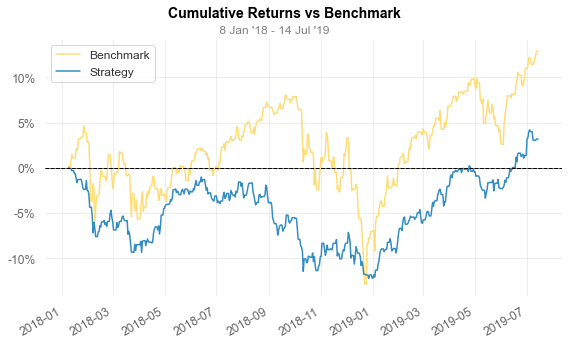

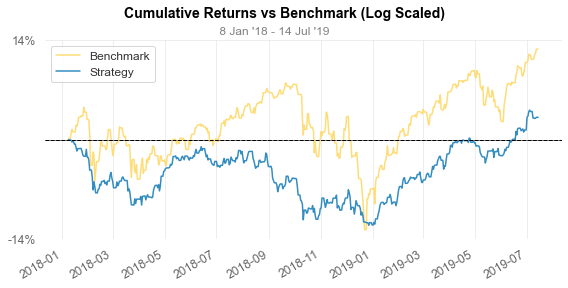

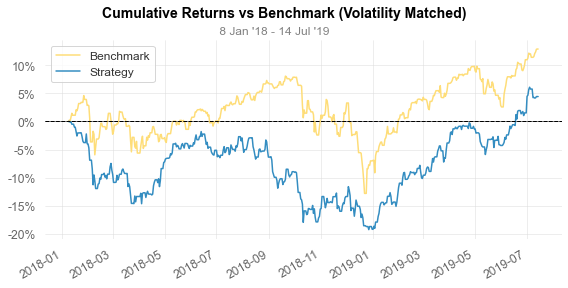

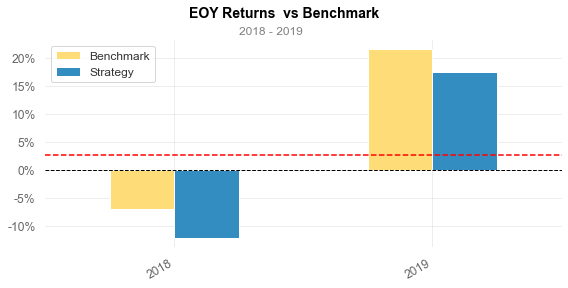

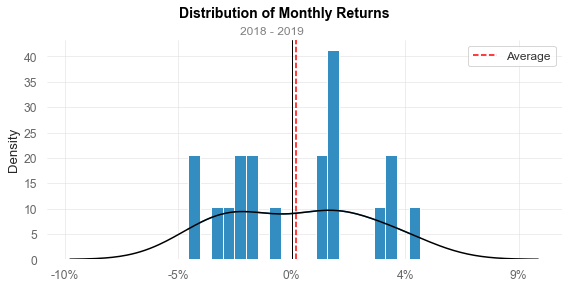

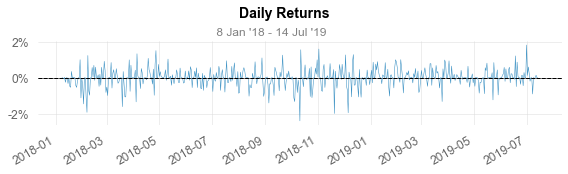

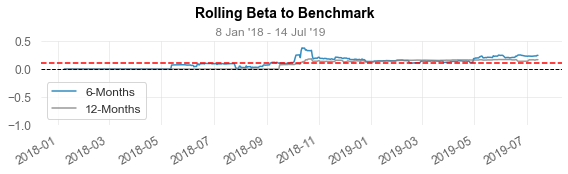

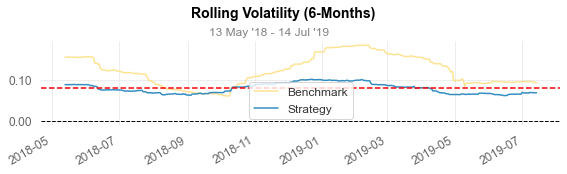

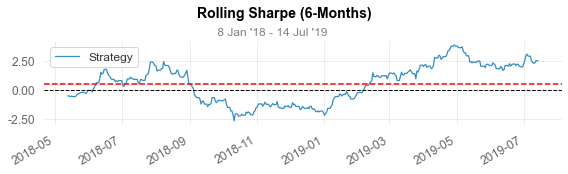

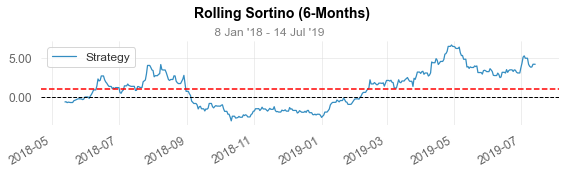

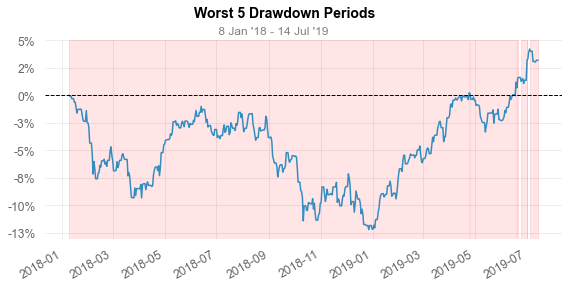

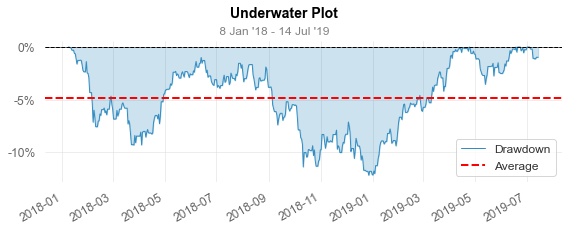

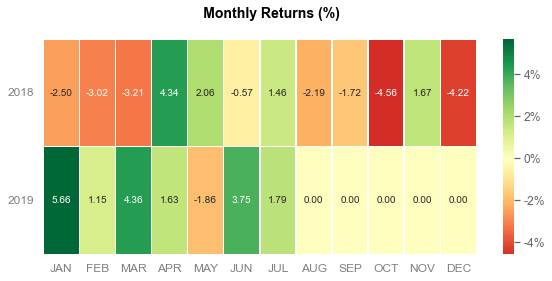

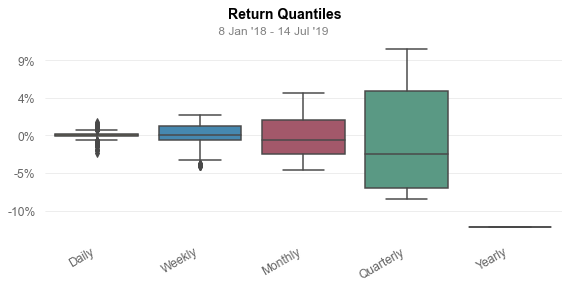

In [28]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'max_return_given_risk_train', prefix_name = prefix_name, file_text = 'max_return_given_risk_train', weights = weights, html = html)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2019-07-15  2019-07-15
End Period                 2022-02-04  2022-02-04
Risk-Free Rate             0.0%        0.0%
Time in Market             71.0%       70.0%

Cumulative Return          30.75%      55.48%
CAGR﹪                     11.03%      18.8%

Sharpe                     0.61        0.71
Smart Sharpe               0.61        0.71
Sortino                    0.83        0.98
Smart Sortino              0.83        0.98
Sortino/√2                 0.59        0.69
Smart Sortino/√2           0.59        0.69
Omega                      1.16        1.16

Max Drawdown               -29.36%     -33.72%
Longest DD Days            207         170
Volatility (ann.)          13.25%      19.4%
R^2                        0.05        0.05
Calmar                     0.38        0.56
Skew                       -0.82       -0.83
Kurtosis                   22.4        21.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-21  2020-03-19  2020-09-15   207    -29.358473        -25.748809
2  2021-11-15  2022-01-28  2022-02-04    81     -7.491085         -7.293162
3  2021-02-17  2021-03-08  2021-05-07    79     -6.451087         -6.425621
4  2021-09-06  2021-10-06  2021-11-04    59     -5.079600         -4.217125
5  2019-07-31  2019-08-16  2019-09-27    58     -4.402368         -4.263625

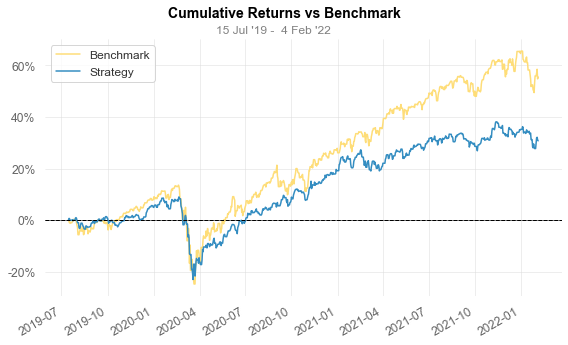

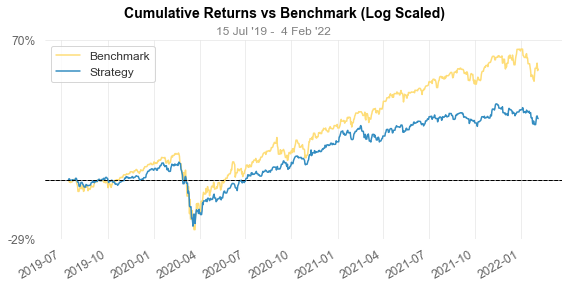

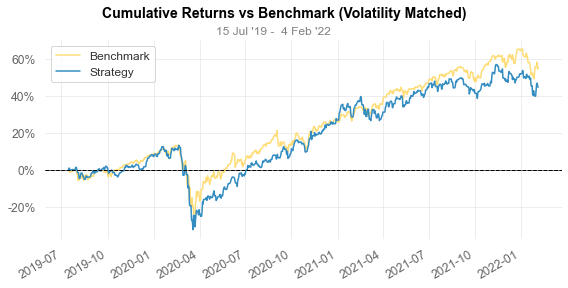

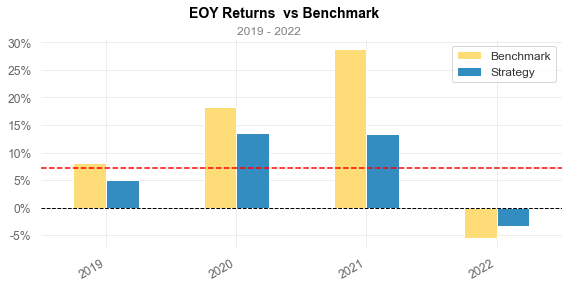

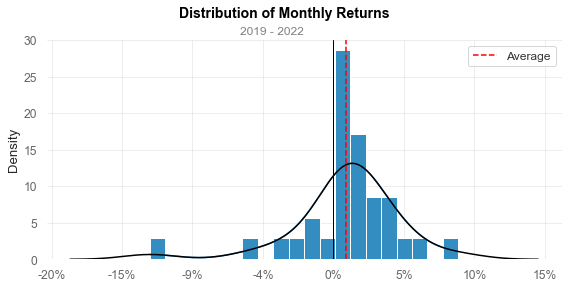

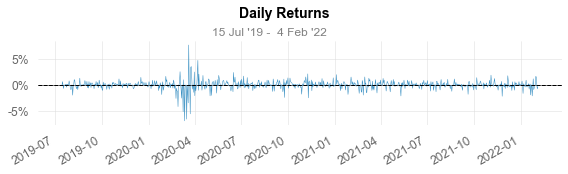

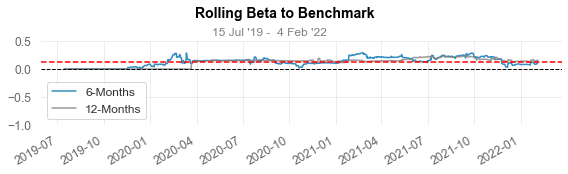

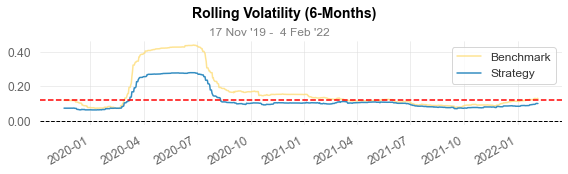

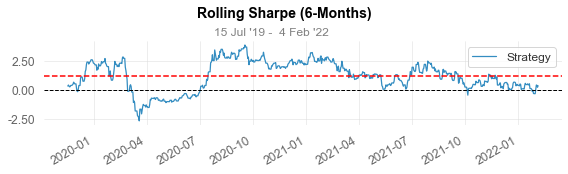

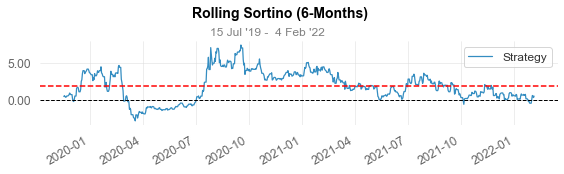

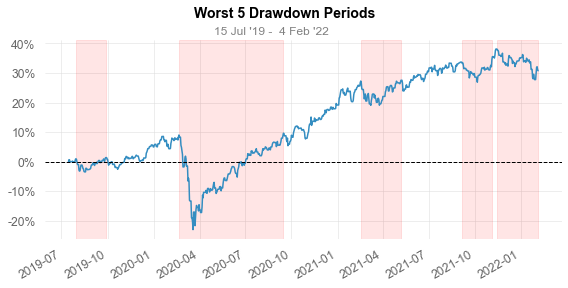

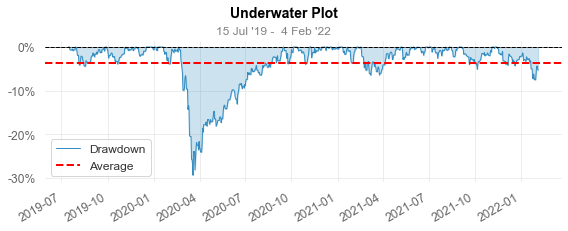

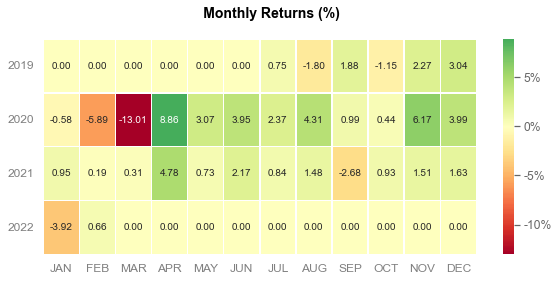

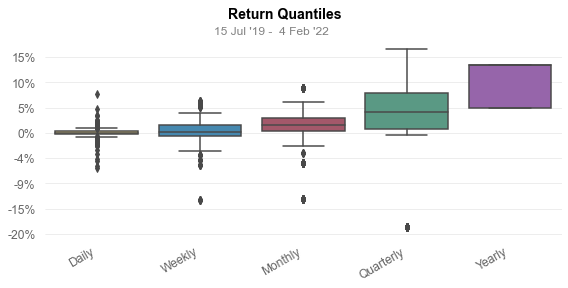

In [29]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'max_return_given_risk_test', prefix_name = prefix_name, file_text = 'max_return_given_risk_test', weights = weights, html = html)

## L2 Regularisation

In [30]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ASI European Real Estate Share I Inc', 0.12098),
             ('BGF World Mining D4 GBP', 0.12986),
             ('Barings Global Agriculture I GBP', 0.12369),
             ('FTF ClearBridge Global Infras Inc XInc', 0.11945),
             ('GS India Equity R Inc GBP', 0.12402),
             ('HSBC World Selection Dynamic C Inc', 0.12056),
             ('HgCapital Trust Ord', 0.12105),
             ('JPMorgan China Growth & Income Ord', 0.14038)])

In [31]:
ef.portfolio_performance(verbose=True)

Expected annual return: 2.3%
Annual volatility: 8.6%
Sharpe Ratio: 0.03


(0.022644911998093747, 0.0857526370391421, 0.030843506268926364)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-08  2018-01-08
End Period                 2019-07-14  2019-07-14
Risk-Free Rate             0.0%        0.0%
Time in Market             70.0%       69.0%

Cumulative Return          2.26%       12.92%
CAGR﹪                     1.49%       8.37%

Sharpe                     0.16        0.49
Smart Sharpe               0.16        0.49
Sortino                    0.22        0.67
Smart Sortino              0.22        0.66
Sortino/√2                 0.16        0.47
Smart Sortino/√2           0.15        0.47
Omega                      1.03        1.03

Max Drawdown               -13.21%     -19.35%
Longest DD Days            523         203
Volatility (ann.)          8.67%       12.97%
R^2                        0.05        0.05
Calmar                     0.11        0.43
Skew                       -0.35       -0.45
Kurtosis                   2.54        6.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-11  2019-01-03  2019-06-18   523    -13.206213        -12.824021
2  2019-07-05  2019-07-11  2019-07-14     9     -1.239447         -1.238614
3  2019-06-24  2019-06-27  2019-07-01     7     -0.505007         -0.429367
4  2019-06-19  2019-06-19  2019-06-20     1     -0.501661          0.000000
5  2018-01-09  2018-01-09  2018-01-10     1     -0.021147          0.000000

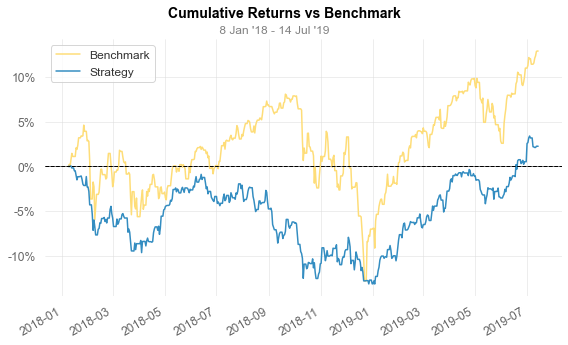

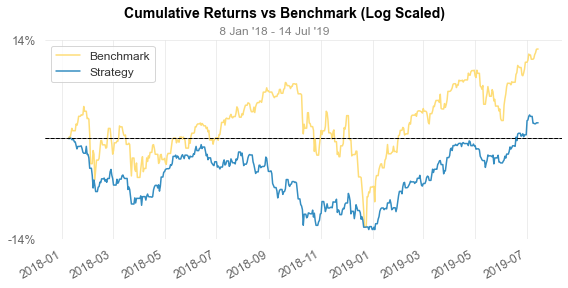

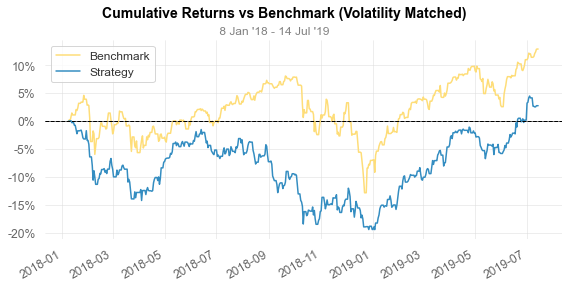

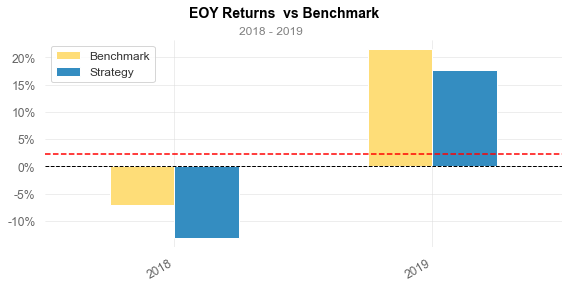

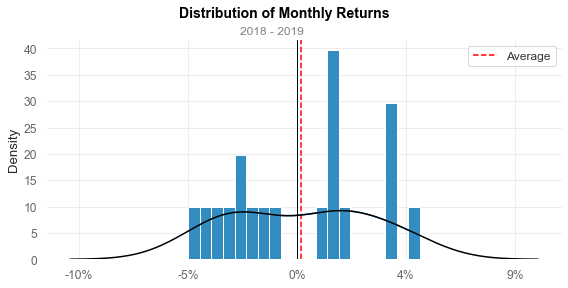

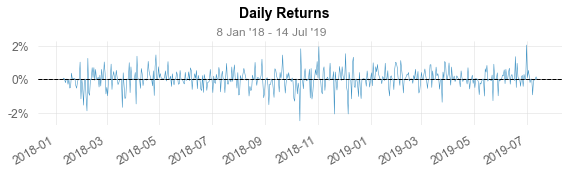

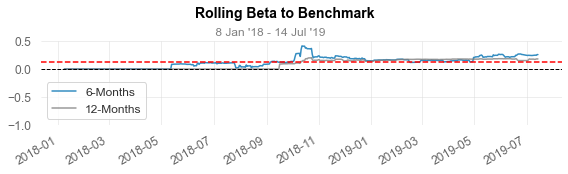

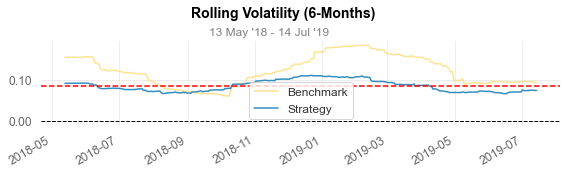

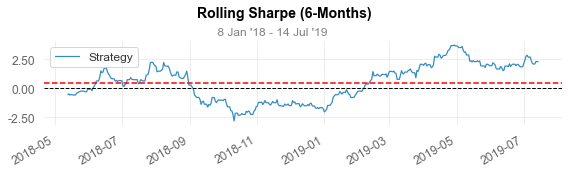

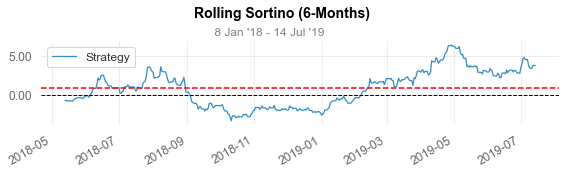

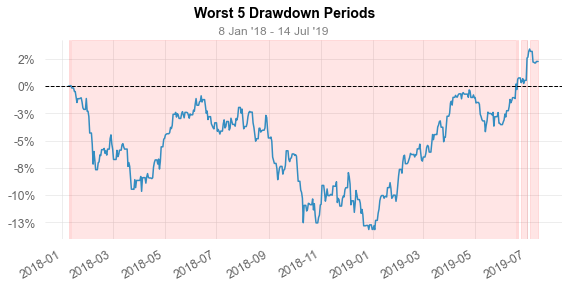

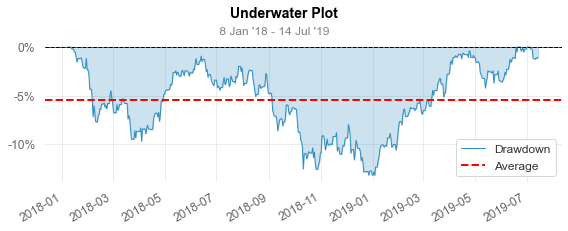

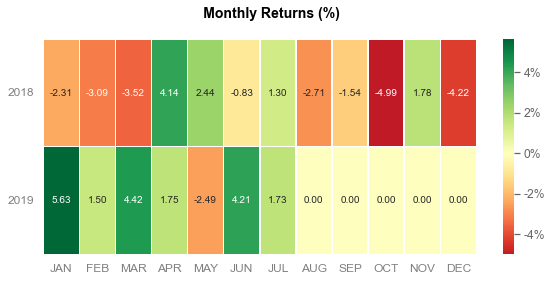

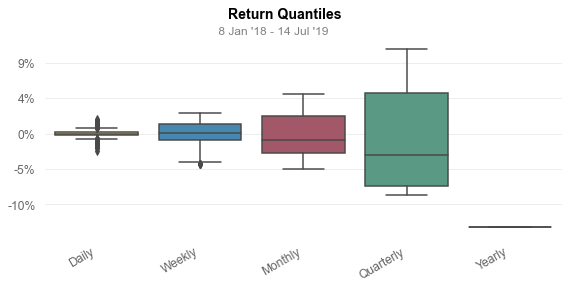

In [32]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'max_return_l2_reg_train', prefix_name = prefix_name, file_text = 'max_return_L2_reg_train', weights = weights, html = html)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2019-07-15  2019-07-15
End Period                 2022-02-04  2022-02-04
Risk-Free Rate             0.0%        0.0%
Time in Market             71.0%       70.0%

Cumulative Return          32.38%      55.48%
CAGR﹪                     11.57%      18.8%

Sharpe                     0.62        0.71
Smart Sharpe               0.61        0.71
Sortino                    0.84        0.98
Smart Sortino              0.84        0.97
Sortino/√2                 0.6         0.69
Smart Sortino/√2           0.59        0.69
Omega                      1.16        1.16

Max Drawdown               -29.4%      -33.72%
Longest DD Days            234         170
Volatility (ann.)          13.81%      19.4%
R^2                        0.05        0.05
Calmar                     0.39        0.56
Skew                       -0.72       -0.83
Kurtosis                   21.06       21.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-01-21  2020-03-19  2020-09-11   234    -29.400638        -25.763091
2  2021-11-15  2022-01-28  2022-02-04    81     -8.095116         -7.683170
3  2021-02-17  2021-03-08  2021-06-01   104     -7.448059         -6.932894
4  2021-08-12  2021-10-06  2021-11-04    84     -5.566826         -4.735131
5  2019-07-31  2019-08-16  2019-09-23    54     -4.518559         -4.343513

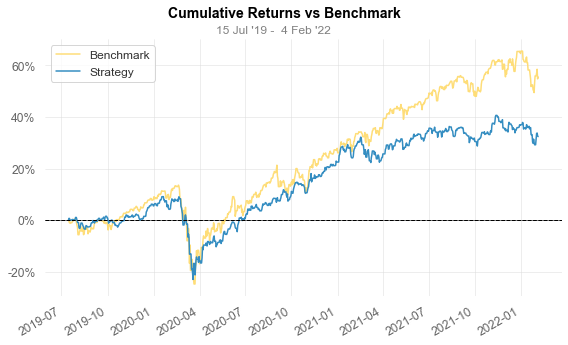

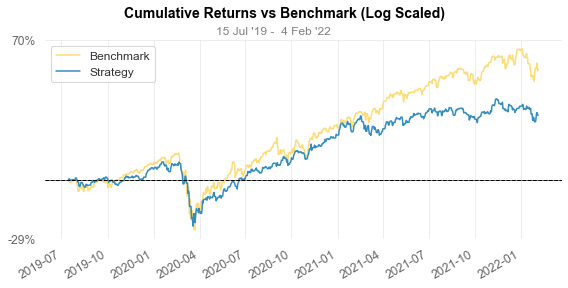

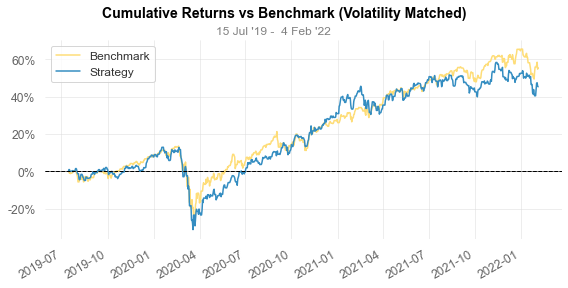

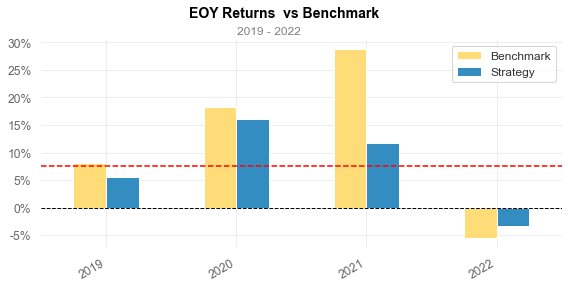

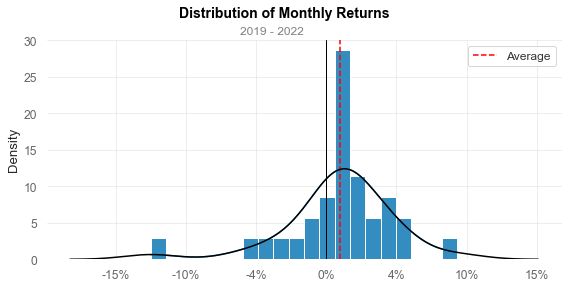

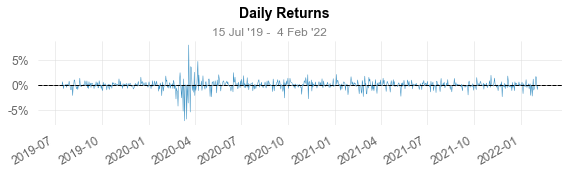

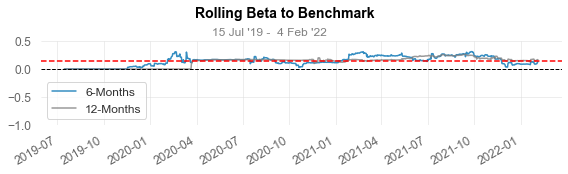

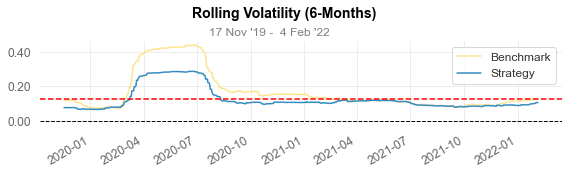

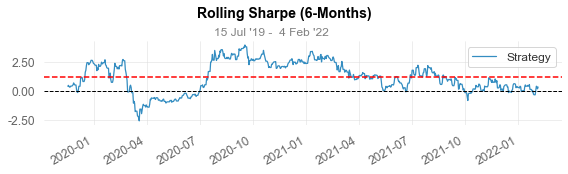

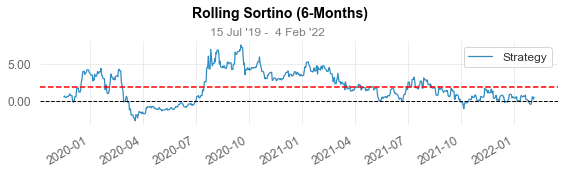

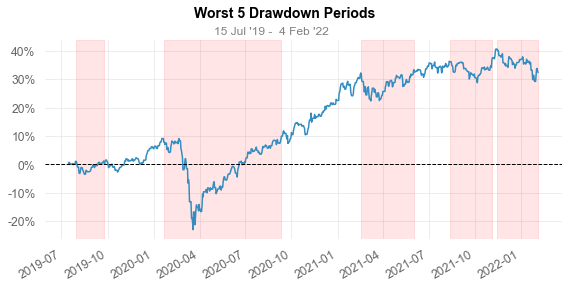

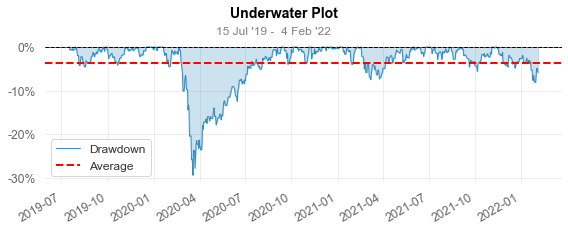

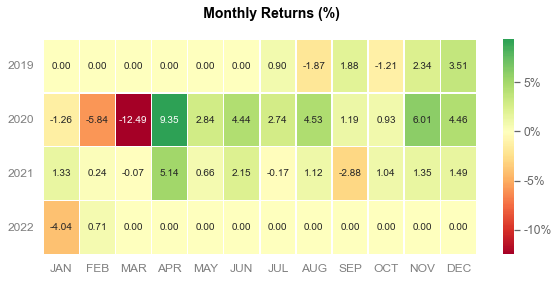

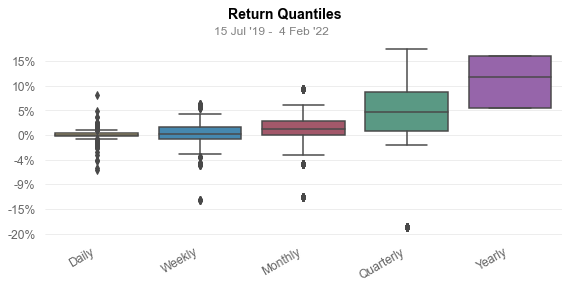

In [33]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'max_return_l2_reg_test', prefix_name = prefix_name, file_text = 'max_return_L2_reg_test', weights = weights, html = html)

## Efficient semi-variance optimization

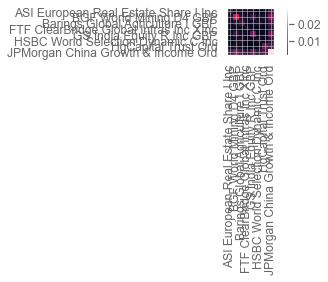

In [34]:
semicov = risk_models.semicovariance(train_df, benchmark=0)
plotting.plot_covariance(semicov);

In [38]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.02)
weights = ef.clean_weights()
weights

OrderedDict([('ASI European Real Estate Share I Inc', 0.1759),
             ('BGF World Mining D4 GBP', 0.0),
             ('Barings Global Agriculture I GBP', 0.0),
             ('FTF ClearBridge Global Infras Inc XInc', 0.35466),
             ('GS India Equity R Inc GBP', 0.01286),
             ('HSBC World Selection Dynamic C Inc', 0.41317),
             ('HgCapital Trust Ord', 0.04341),
             ('JPMorgan China Growth & Income Ord', 0.0)])

In [39]:
ef.portfolio_performance(verbose=True);

Expected annual return: 2.2%
Annual volatility: 5.2%
Sharpe Ratio: 0.03


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-08  2018-01-08
End Period                 2019-07-14  2019-07-14
Risk-Free Rate             0.0%        0.0%
Time in Market             70.0%       69.0%

Cumulative Return          7.6%        12.92%
CAGR﹪                     4.96%       8.37%

Sharpe                     0.52        0.49
Smart Sharpe               0.48        0.46
Sortino                    0.73        0.67
Smart Sortino              0.68        0.62
Sortino/√2                 0.52        0.47
Smart Sortino/√2           0.48        0.44
Omega                      1.11        1.11

Max Drawdown               -10.33%     -19.35%
Longest DD Days            236         203
Volatility (ann.)          6.87%       12.97%
R^2                        0.02        0.02
Calmar                     0.48        0.43
Skew                       -0.37       -0.45
Kurtosis                   3.8         6.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-08-09  2018-12-27  2019-04-02   236    -10.328851         -9.992400
2  2018-01-09  2018-03-26  2018-07-27   199     -9.243479         -8.677619
3  2019-04-26  2019-05-09  2019-05-21    25     -1.802106         -1.778520
4  2019-05-23  2019-06-03  2019-06-07    15     -1.569535         -1.306376
5  2019-06-24  2019-06-27  2019-07-02     8     -1.282441         -0.931343

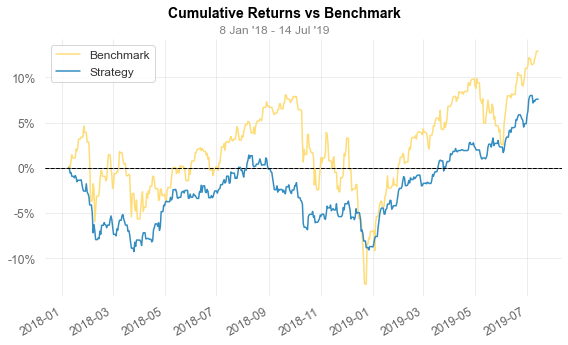

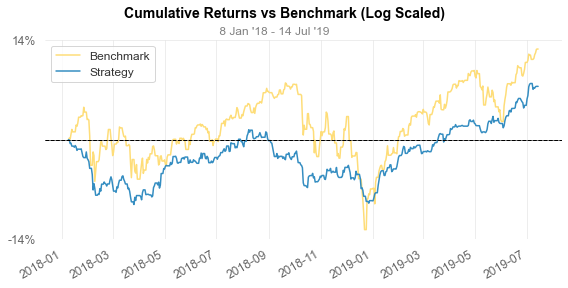

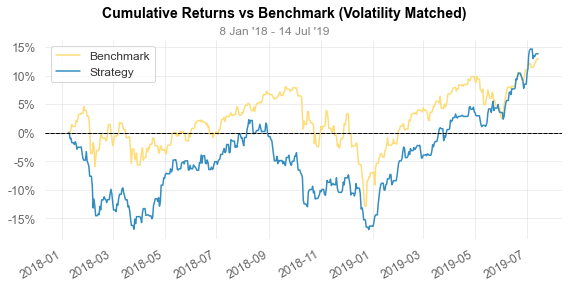

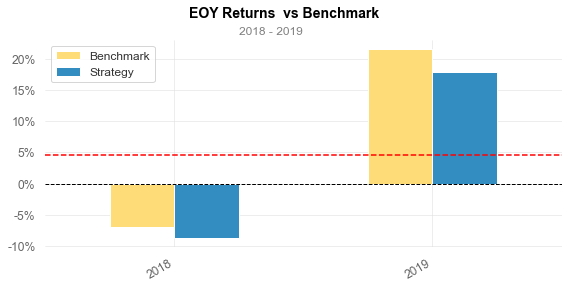

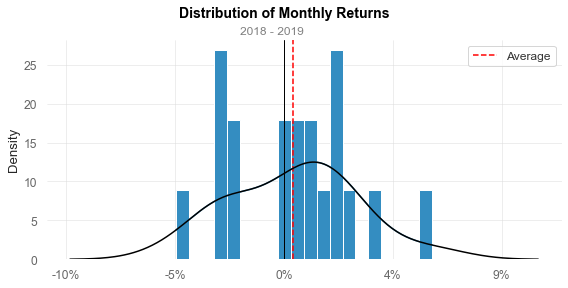

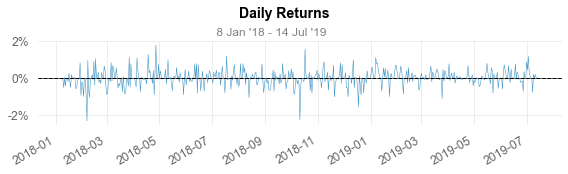

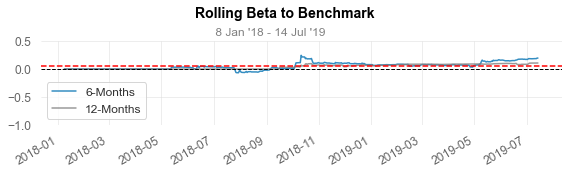

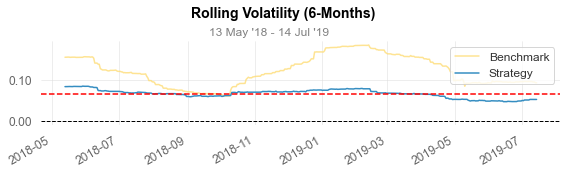

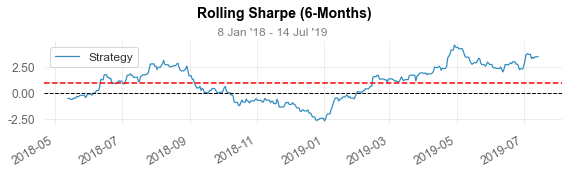

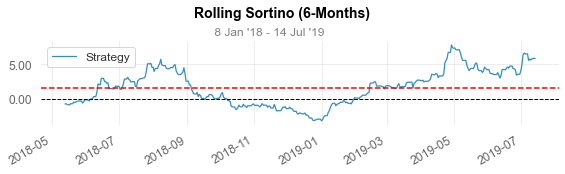

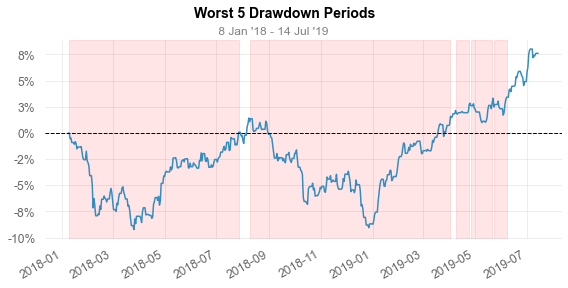

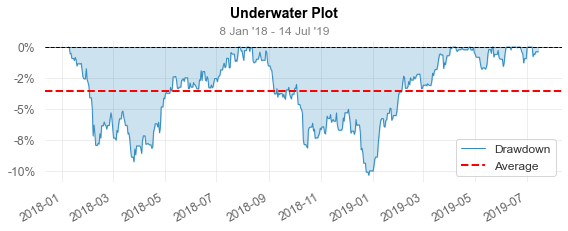

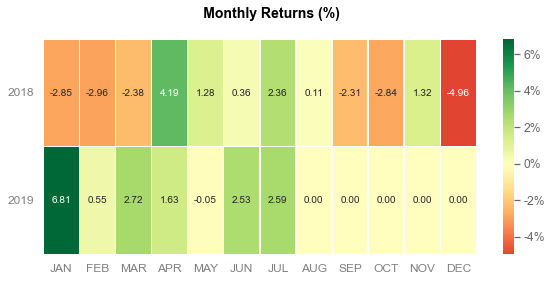

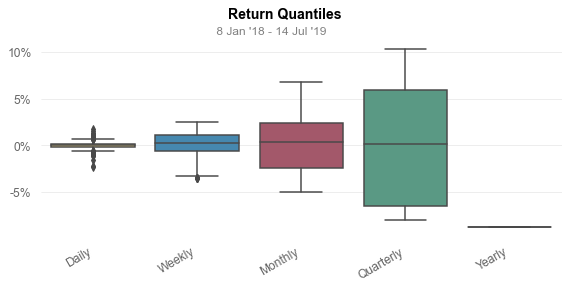

In [40]:
generate_performance_metrics(prices_pivot = train_df, benchmark = 'SPY', title = 'semi_var_opt_train', prefix_name = prefix_name, file_text = 'semi_var_opt_train', weights = weights, html = html)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2019-07-15  2019-07-15
End Period                 2022-02-04  2022-02-04
Risk-Free Rate             0.0%        0.0%
Time in Market             70.0%       70.0%

Cumulative Return          11.94%      55.48%
CAGR﹪                     4.5%        18.8%

Sharpe                     0.34        0.71
Smart Sharpe               0.32        0.67
Sortino                    0.45        0.98
Smart Sortino              0.43        0.92
Sortino/√2                 0.32        0.69
Smart Sortino/√2           0.3         0.65
Omega                      1.08        1.08

Max Drawdown               -26.3%      -33.72%
Longest DD Days            479         170
Volatility (ann.)          10.82%      19.4%
R^2                        0.02        0.02
Calmar                     0.17        0.56
Skew                       -1.16       -0.83
Kurtosis                   14.59       21.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-21  2020-03-23  2021-06-14   479    -26.301351        -24.053222
2  2022-01-05  2022-01-25  2022-02-04    30     -6.002451         -5.717439
3  2021-09-03  2021-10-06  2021-11-02    60     -4.466901         -3.515857
4  2019-07-31  2019-08-15  2019-12-18   140     -3.596728         -3.341145
5  2021-11-16  2021-12-02  2022-01-04    49     -3.295060         -2.723364

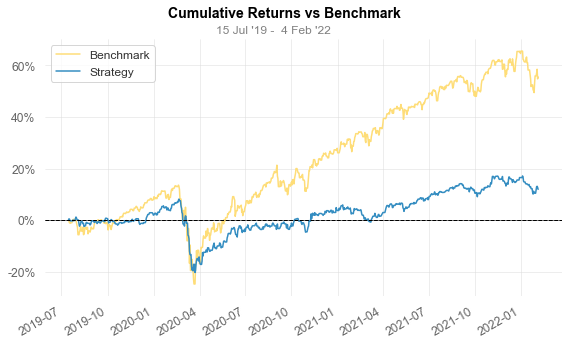

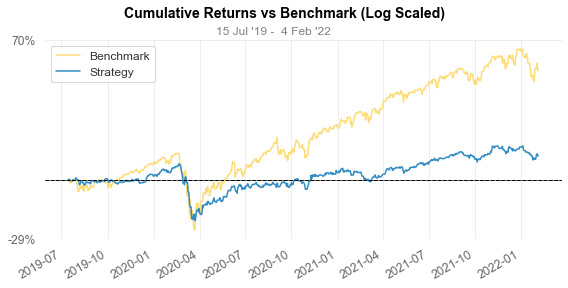

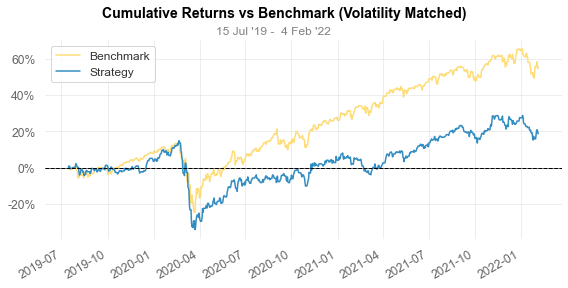

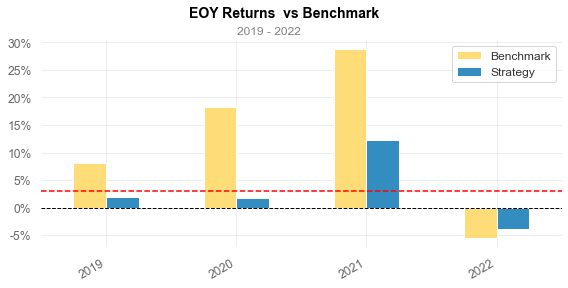

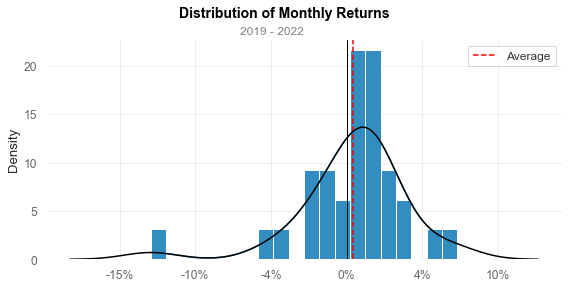

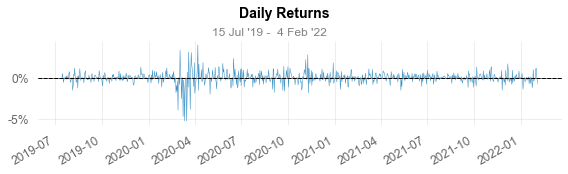

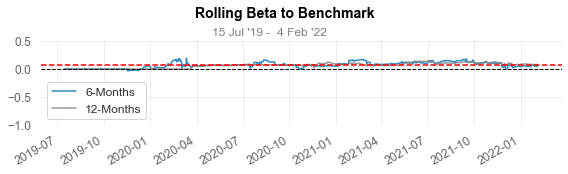

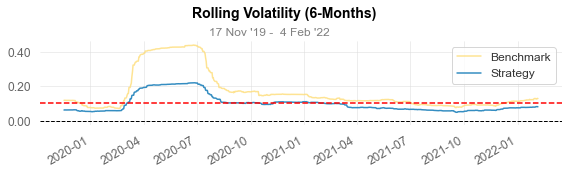

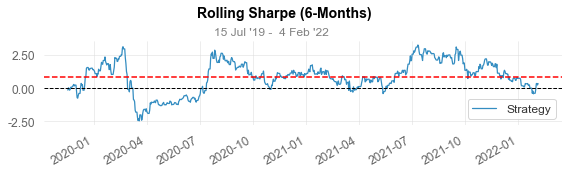

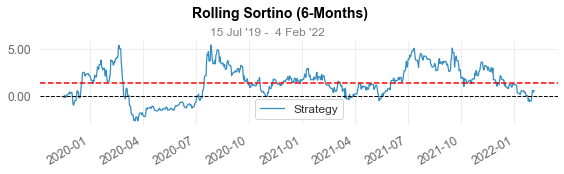

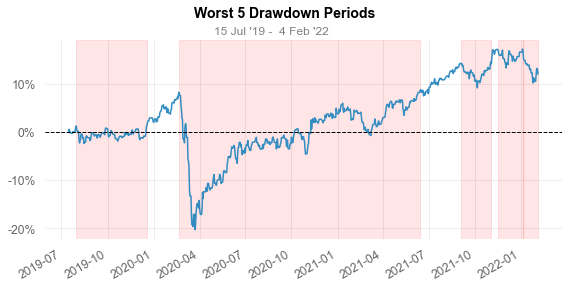

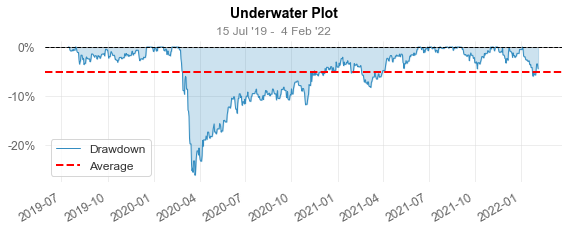

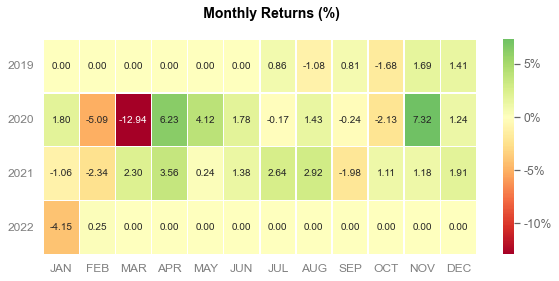

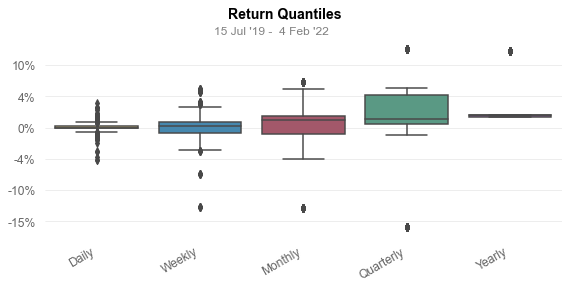

In [41]:
generate_performance_metrics(prices_pivot = test_df, benchmark = 'SPY', title = 'semi_var_opt_train_test', prefix_name = prefix_name, file_text = 'semi_var_opt_train_test', weights = weights, html = html)

## Efficient CVaR optimization

In [42]:
returns = expected_returns.returns_from_prices(train_df).dropna()
returns.head()

Name        ASI European Real Estate Share I Inc  BGF World Mining D4 GBP  \
Date                                                                        
2018-01-09                             -0.001827                 0.003326   
2018-01-10                             -0.006072                 0.002320   
2018-01-11                             -0.005021                 0.004299   
2018-01-12                             -0.004458                 0.004281   
2018-01-13                              0.000000                 0.000000   

Name        Barings Global Agriculture I GBP  \
Date                                           
2018-01-09                         -0.005448   
2018-01-10                          0.000000   
2018-01-11                         -0.002950   
2018-01-12                         -0.003804   
2018-01-13                          0.000000   

Name        FTF ClearBridge Global Infras Inc XInc  GS India Equity R Inc GBP  \
Date                                                                            
2018-01-09                               -0.002833                   0.000382   
2018-01-10                               -0.008523                  -0.001911   
2018-01-11                                0.000000                   0.001149   
2018-01-12                               -0.005731                  -0.008416   
2018-01-13                                0.000000                   0.000000   

Name        HSBC World Selection Dynamic C Inc  HgCapital Trust Ord  \
Date                                                                  
2018-01-09                            0.001728             0.002793   
2018-01-10                           -0.001294            -0.008357   
2018-01-11                            0.003022             0.002809   
2018-01-12                           -0.003114             0.000000   
2018-01-13                            0.000000             0.000000   

Name        JPMorgan China Growth & Income Ord  
Date                                            
2018-01-09                            0.000000  
2018-01-10                            0.025000  
2018-01-11                           -0.003049  
2018-01-12                            0.003058  
2018-01-13                            0.000000

In [43]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 2.3%
Annual volatility: 8.4%
Sharpe Ratio: 0.03


## Plotting - Unconstrained

In [44]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 2.2%
Annual volatility: 6.6%
Sharpe Ratio: 0.03


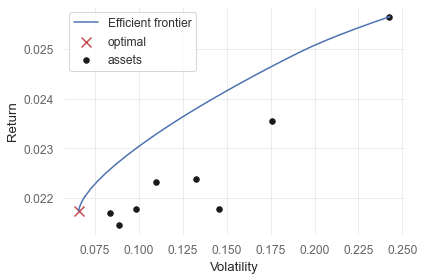

In [45]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

## Riskfolio

In [47]:
import riskfolio as rp

In [53]:
Y = train_df.pct_change().dropna()
display(Y.head())

Name        ASI European Real Estate Share I Inc  BGF World Mining D4 GBP  \
Date                                                                        
2018-01-09                             -0.001827                 0.003326   
2018-01-10                             -0.006072                 0.002320   
2018-01-11                             -0.005021                 0.004299   
2018-01-12                             -0.004458                 0.004281   
2018-01-13                              0.000000                 0.000000   

Name        Barings Global Agriculture I GBP  \
Date                                           
2018-01-09                         -0.005448   
2018-01-10                          0.000000   
2018-01-11                         -0.002950   
2018-01-12                         -0.003804   
2018-01-13                          0.000000   

Name        FTF ClearBridge Global Infras Inc XInc  GS India Equity R Inc GBP  \
Date                                                                            
2018-01-09                               -0.002833                   0.000382   
2018-01-10                               -0.008523                  -0.001911   
2018-01-11                                0.000000                   0.001149   
2018-01-12                               -0.005731                  -0.008416   
2018-01-13                                0.000000                   0.000000   

Name        HSBC World Selection Dynamic C Inc  HgCapital Trust Ord  \
Date                                                                  
2018-01-09                            0.001728             0.002793   
2018-01-10                           -0.001294            -0.008357   
2018-01-11                            0.003022             0.002809   
2018-01-12                           -0.003114             0.000000   
2018-01-13                            0.000000             0.000000   

Name        JPMorgan China Growth & Income Ord  
Date                                            
2018-01-09                            0.000000  
2018-01-10                            0.025000  
2018-01-11                           -0.003049  
2018-01-12                            0.003058  
2018-01-13                            0.000000

In [54]:
port = rp.Portfolio(returns=Y)

In [56]:
Y.dtypes

Name
ASI European Real Estate Share I Inc      float64
BGF World Mining D4 GBP                   float64
Barings Global Agriculture I GBP          float64
FTF ClearBridge Global Infras Inc XInc    float64
GS India Equity R Inc GBP                 float64
HSBC World Selection Dynamic C Inc        float64
HgCapital Trust Ord                       float64
JPMorgan China Growth & Income Ord        float64
dtype: object

In [55]:
w = port.optimization(model='Classic', rm='MV', obj='Sharpe', rf=0, l=0, hist=True)

#display(w.T)

ValueError: object arrays are not supported

In [ ]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms